# Telco Churn Prediction

By predicting the likelihood of a customer leaving a service, a business can adopt more targetted strategies to retain them. This can come from pushing marketing content or granting store credits to the identified customers who are leaving.  

Source: https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
## reading CSV file from KAGGLE
df = pd.read_csv('00 Data Sets/Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

# 1. Exploratory Data Anaysis (EDA)

## 1.1. Analysis of Dependent Variable

<AxesSubplot:xlabel='Churn', ylabel='count'>

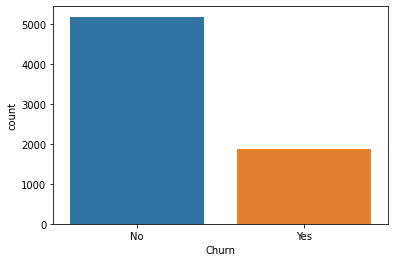

In [3]:
## Checking ratio of dependent variable's classes
sns.countplot(x = df['Churn'])

In [4]:
print( f"Skewness: {pd.get_dummies(df['Churn'], drop_first = True).skew()}" )

Skewness: Yes    1.063031
dtype: float64


Skewness > 1 indicates a strong positive skew.

In [5]:
print( f"Kurtosis: {pd.get_dummies(df['Churn'], drop_first = True).kurtosis()}" )

Kurtosis: Yes   -0.870211
dtype: float64


Kurtosis < 3 means it is very flat.

## 1.2. Data Set Brief

In [6]:
## Use Profile Report to get an immediate summary of the data
from pandas_profiling import ProfileReport

profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
## Based on the unique values of the object variables, i see similarities in the 'no internet services'. Is this shared?
test_df = df[df['OnlineSecurity']=='No internet service']
# test_df = df[df['MultipleLines'] == 'No phone service']

for i in test_df.select_dtypes(include=['object']).columns.tolist():
    array_ = test_df[i].unique()
    print('{}: {}'.format(i, array_))

customerID: ['7469-LKBCI' '8191-XWSZG' '1680-VDCWW' ... '9837-FWLCH' '0871-OPBXW'
 '2569-WGERO']
gender: ['Male' 'Female']
Partner: ['No' 'Yes']
Dependents: ['No' 'Yes']
PhoneService: ['Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['No']
OnlineSecurity: ['No internet service']
OnlineBackup: ['No internet service']
DeviceProtection: ['No internet service']
TechSupport: ['No internet service']
StreamingTV: ['No internet service']
StreamingMovies: ['No internet service']
Contract: ['Two year' 'One year' 'Month-to-month']
PaperlessBilling: ['No' 'Yes']
PaymentMethod: ['Credit card (automatic)' 'Mailed check' 'Bank transfer (automatic)'
 'Electronic check']
TotalCharges: ['326.8' '1022.95' '202.25' ... '239' '39.25' '1419.4']
Churn: ['No' 'Yes']


In [8]:
df['TotalCharges'].head() ## will need to change this into a float

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [9]:
## For TotalCharges, there are values that are filled with spaces.. Need to correct them.

df[df['TotalCharges'].str.contains(' ')]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55                  No  
753                Mailed check          20.25                  No  
936                Mailed check          80.85                  No  
1082               Mailed check          25.75                  No  
1340    Credit card (automatic)          56.05                  No  
3331               Mailed check          19.85                  No  
3826               Mailed check          25.35                  No  
4380               Mailed check          20.00                  No  
5218               Mailed check          19.7

In [10]:
## From the above results, seems like they share a tenure == 0. Proven with the below

df[df['tenure']==0]

## It is likely that these customers have only just signed with the telco. Hence, their totalcharges can be set to 0.

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55                  No  
753                Mailed check          20.25                  No  
936                Mailed check          80.85                  No  
1082               Mailed check          25.75                  No  
1340    Credit card (automatic)          56.05                  No  
3331               Mailed check          19.85                  No  
3826               Mailed check          25.35                  No  
4380               Mailed check          20.00                  No  
5218               Mailed check          19.7

## 1.1. Notes on features

- OnlineSecurity, OnlineBackup, DeviceProtection, Tech Support, StreamingTV and StreamingMovies
    - They share a common 'No internet service' value. 
    - When an observation has ‘No internet service' for any of these attributes, it would be true for the remaining attributes too. 
- There are instances where the TotalCharges are ‘blank’.
    - They occur when the Tenure == 0; implies these customers just onboarded with the telco.

In [11]:
############# Data Cleaning ################
## 1a. Convert the blank values of TotalCharges into 0.0
for i in df[df['TotalCharges'].str.contains(' ')].index.tolist():
    df['TotalCharges'].iloc[i] = '0.0'

## 1b. Convert the TotalCharges into float
df['TotalCharges'] = df['TotalCharges'].astype(float)


## info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## 1.3. Analysis of Independent Variables

In [12]:
## initiation of cufflinks to plot plotly visuals
import cufflinks as cf
import plotly.offline

cf.go_offline()
cf.set_config_file(offline = False, world_readable = True)

### 1.3.1. Numerical Features

In [13]:
## creating variable of numerical attributes
numerical = df.select_dtypes(include=np.number).columns.tolist()
numerical

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

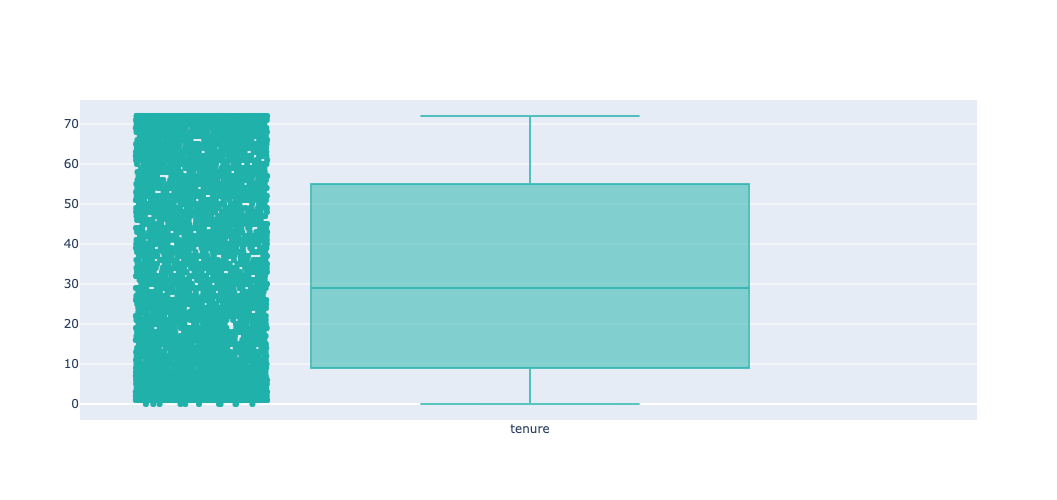

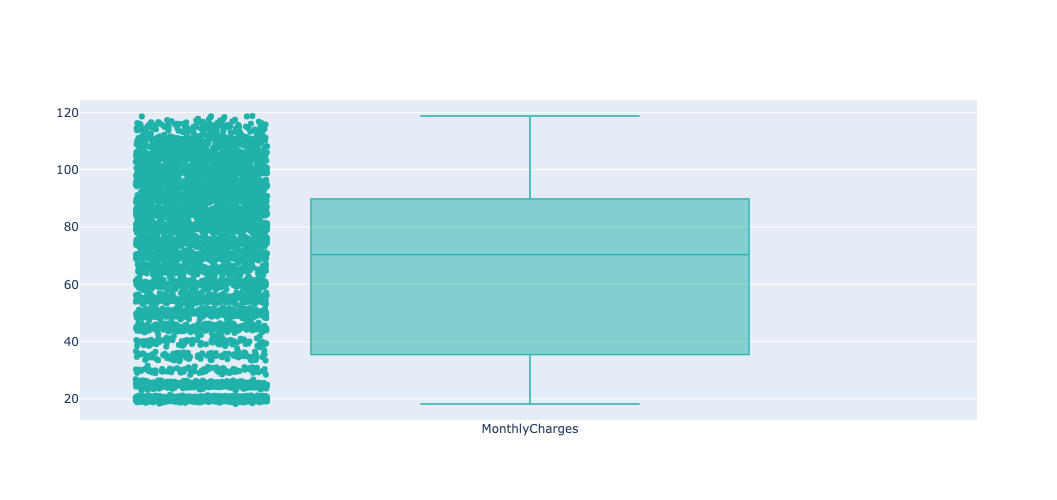

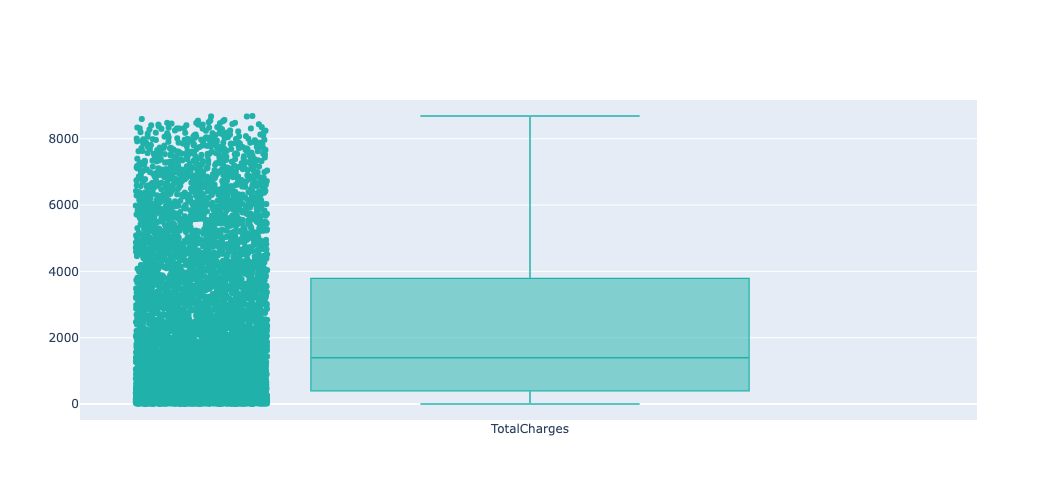

In [14]:
## setting of layour size thorugh Cufflinks
layout1 = cf.Layout(
    height=500
)

for i in df[numerical].drop("SeniorCitizen", axis=1):
    df[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen', layout=layout1)

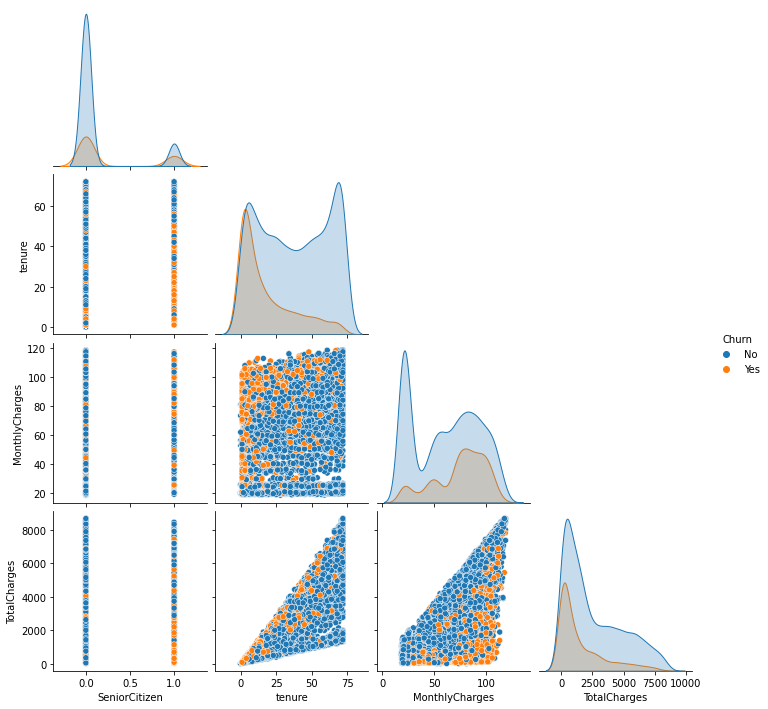

In [15]:
sns.pairplot(df, hue = 'Churn', corner =True)

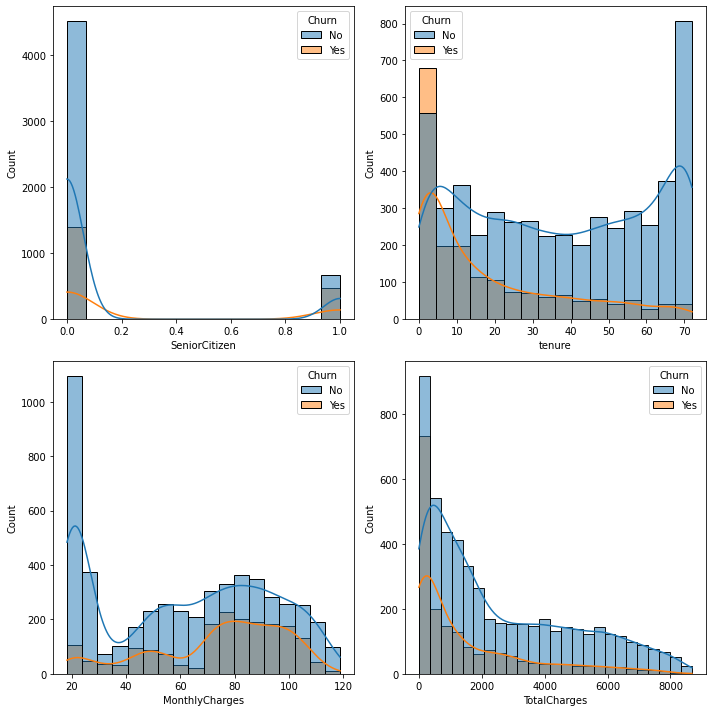

In [16]:
############### Histplot of attributes with hues of the CHURN ##############
# object_attr_list = df.select_dtypes(include=['float']).columns.tolist()
plt.figure(figsize = (10,10))


for i in range(len(numerical)):
    plt.subplot(2,2,i+1)
    sns.histplot(x = df[numerical[i]], hue = df['Churn'], kde = True, fill = True)

plt.tight_layout()

Observation:
- Higher proportion of churn is observed when Monthly Charges exceed about $70

- Higher proportion of churn is observed when Total Charges are about lesser than $300

- Churning tends to take place in younger tenured customers.

### 1.3.2. Categorical Values

In [17]:
## creating of varaible for categorical attributes
categorical = df.drop(['Churn','customerID'], axis = 1).select_dtypes(include = 'object').columns.tolist()
categorical

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [18]:
## Find out the cardinalities of the categorical values
df[categorical].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

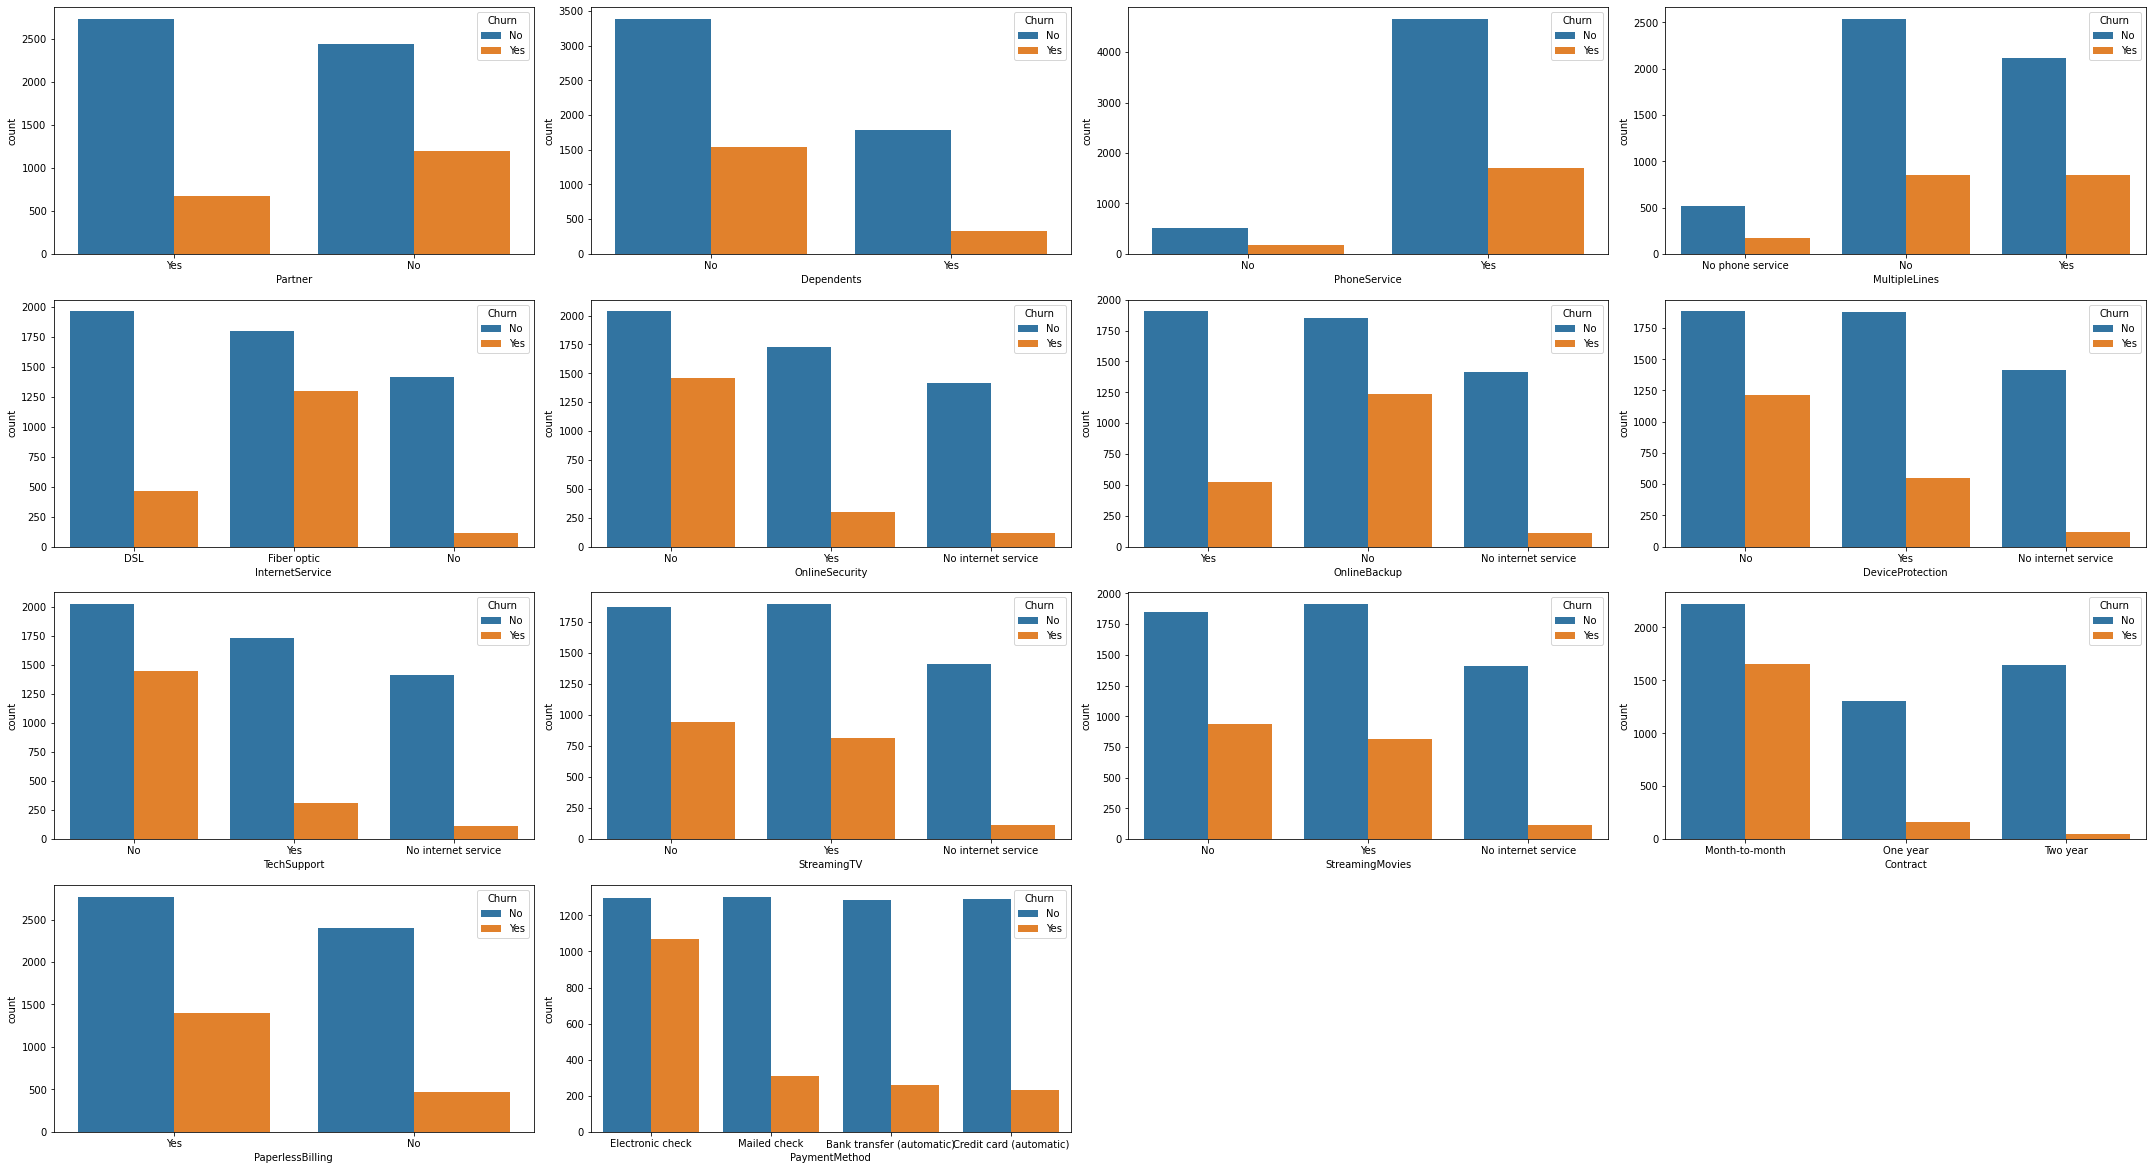

In [19]:
############### Countplot of attributes with hues of the CHURN ##############
plt.figure(figsize = (30,20))


for i in range(1, len(categorical)):
    plt.subplot(5,4,i)
    sns.countplot(data = df, x = categorical[i], hue = 'Churn')

plt.tight_layout()


In [20]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

Observation: The 'multipleLines' field returned 'No Phone Service'. We'll assume that 'no phone service' is a 'no' for multipleLines. Similarly, 'no internet service' will be assumed as 'no' for the relevant attributes. Hence, we'll convert them to 'no'.

No Phone Service:
- MultipleLines

Not Internet Service:
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies

In [21]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')
df[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']] = df[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service', 'No')

## Find out the cardinalities of the categorical values
df[categorical].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       2
InternetService     3
OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
StreamingTV         2
StreamingMovies     2
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

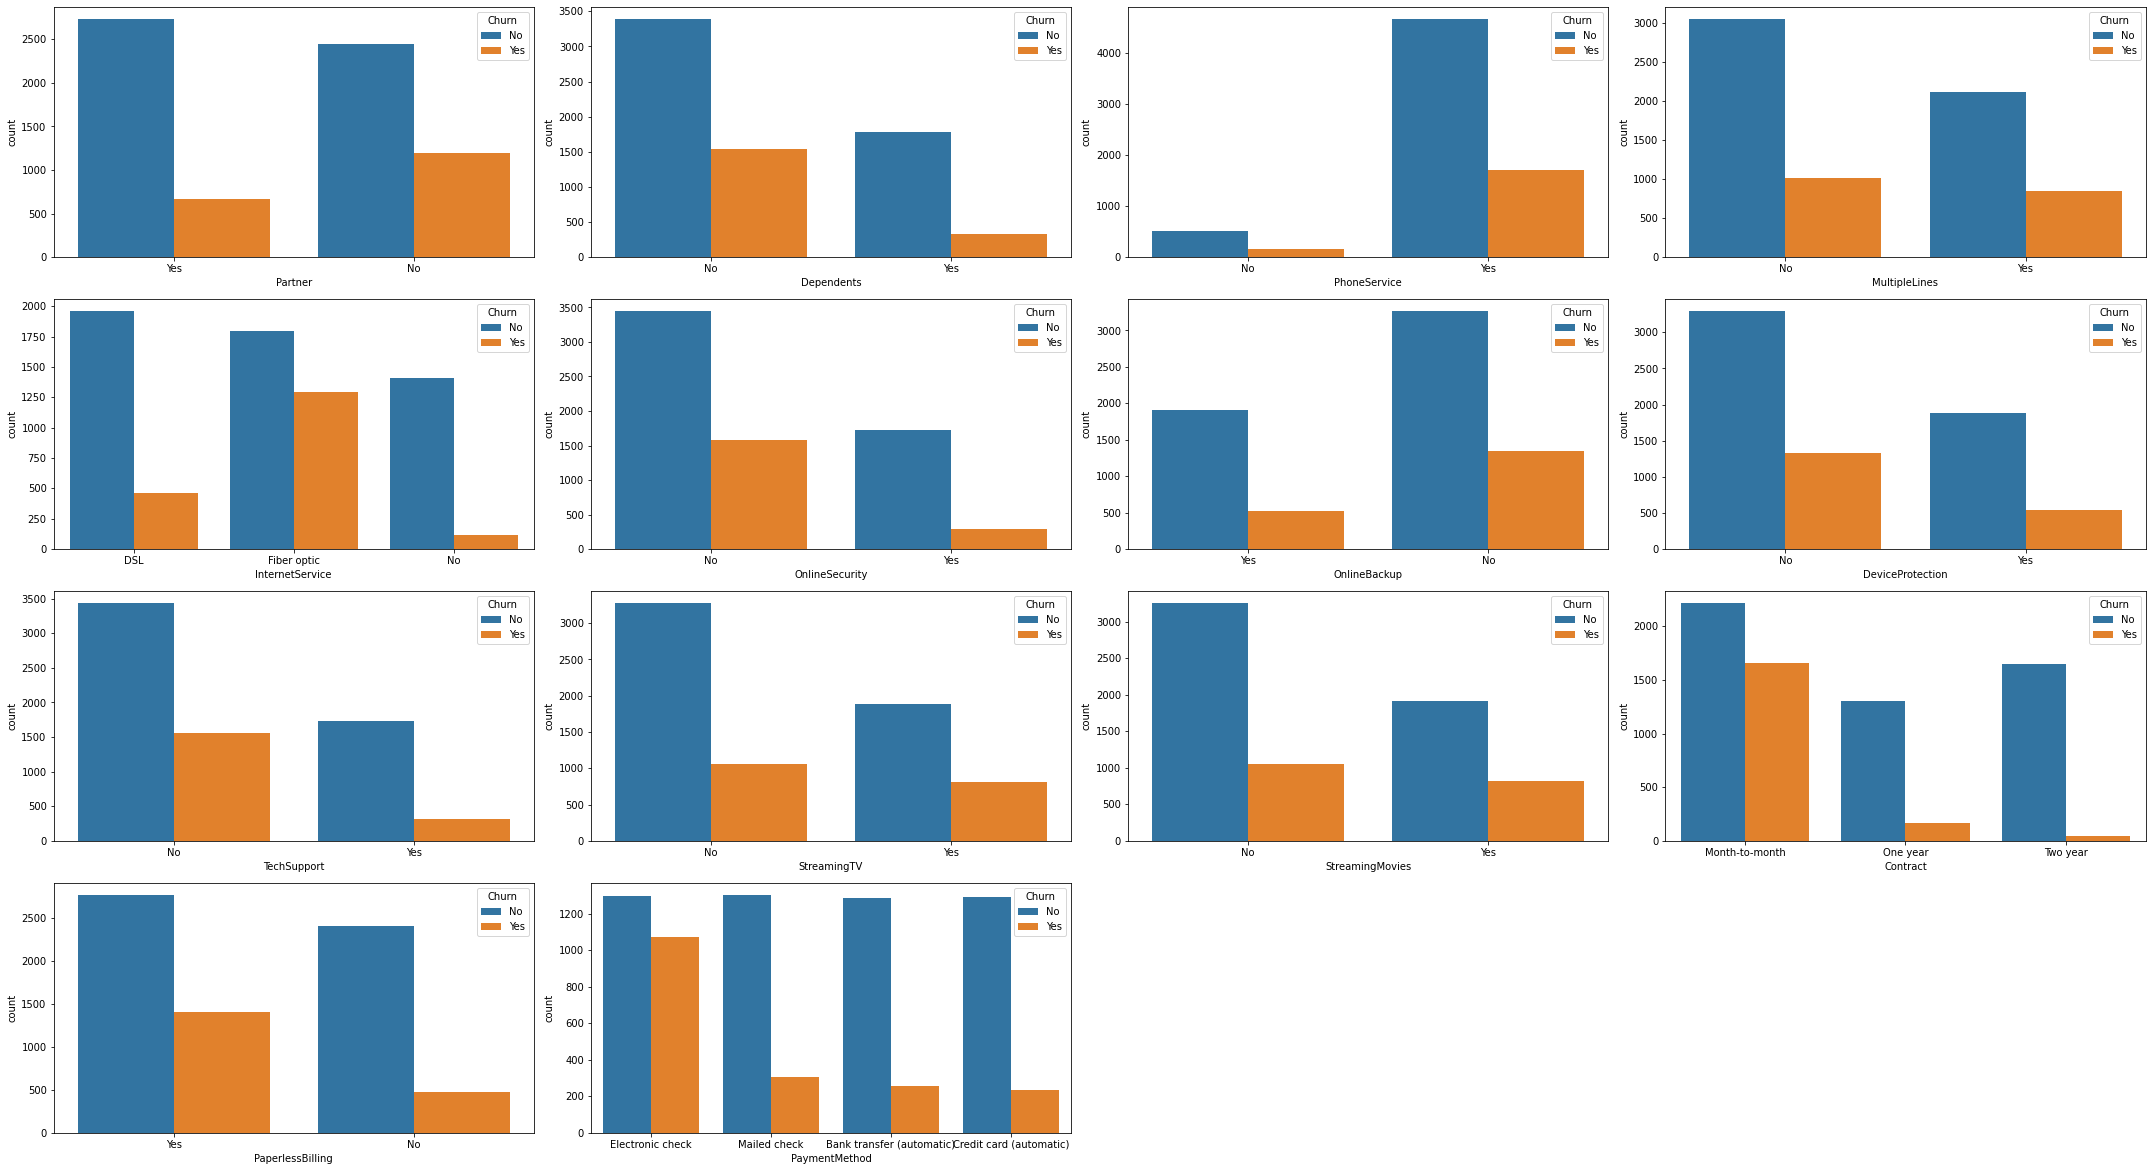

In [22]:
############### Countplot of attributes with hues of the CHURN ##############
plt.figure(figsize = (30,20))


for i in range(1, len(categorical)):
    plt.subplot(5,4,i)
    sns.countplot(data = df, x = categorical[i], hue = 'Churn')

plt.tight_layout()


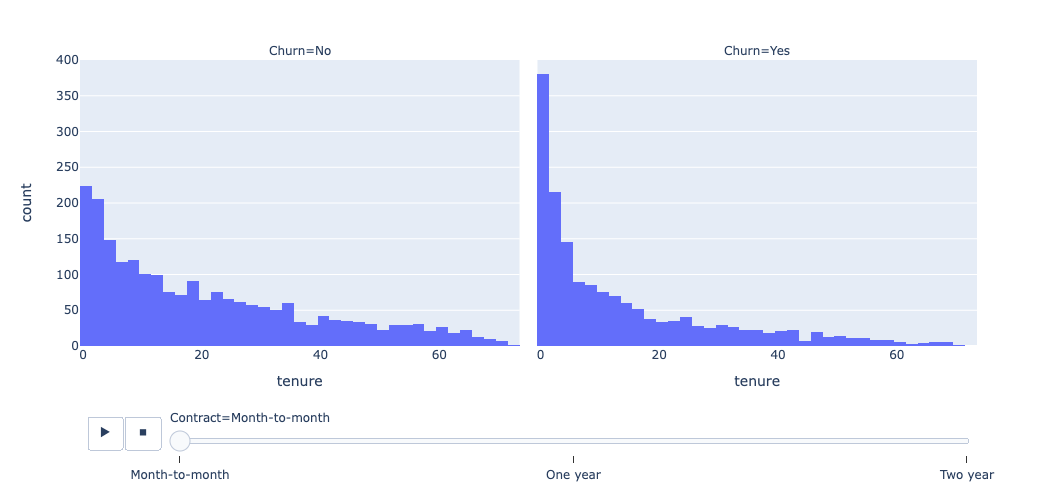

In [23]:
import plotly.express as px

fig = px.histogram(df, x = 'tenure', animation_frame = 'Contract', facet_col = 'Churn'
                  ,height = 500)
fig.show()

## 1.4. Inputing of missing values

Observation:
- Since there's no missing values from the above Data Set Brief, this section has no inputs.

# 2. Feature Selection

In [24]:
########### Performing One Hot Encoding ###########

ohe_variables = ['MultipleLines', 'InternetService', 'OnlineSecurity'
                 , 'OnlineBackup', 'DeviceProtection', 'TechSupport'
                 , 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
ohe_df_list = []

for var in ohe_variables:
    ohe_df_list.append(pd.get_dummies(df[var],prefix = var))
    
ohe_variables_drop_first = ['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']

for var in ohe_variables_drop_first:
    ohe_df_list.append(pd.get_dummies(df[var],prefix = var, drop_first = True))
    
df_ohe_friendly = pd.concat([df] + ohe_df_list, axis = 1).drop(ohe_variables + ohe_variables_drop_first + ['customerID'], axis = 1)
df_ohe_friendly
                    

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  MultipleLines_No  \
0                 0       1           29.85         29.85                 1   
1                 0      34           56.95       1889.50                 1   
2                 0       2           53.85        108.15                 1   
3                 0      45           42.30       1840.75                 1   
4                 0       2           70.70        151.65                 1   
...             ...     ...             ...           ...               ...   
7038              0      24           84.80       1990.50                 0   
7039              0      72          103.20       7362.90                 0   
7040              0      11           29.60        346.45                 1   
7041              1       4           74.40        306.60                 0   
7042              0      66          105.65       6844.50                 1   

      MultipleLines_Yes  InternetService_DSL  InternetService_Fiber optic  \
0                     0                    1                            0   
1                     0                    1                            0   
2                     0                    1                            0   
3                     0                    1                            0   
4                     0                    0                            1   
...                 ...                  ...                          ...   
7038                  1                    1                            0   
7039                  1                    0                            1   
7040                  0                    1                            0   
7041                  1                    0                            1   
7042                  0                    0                            1   

      InternetService_No  OnlineSecurity_No  ...  \
0                      0                  1  ...   
1                      0                  0  ...   
2                      0                  0  ...   
3                      0                  0  ...   
4                      0                  1  ...   
...                  ...                ...  ...   
7038                   0                  0  ...   
7039                   0                  1  ...   
7040                   0                  0  ...   
7041                   0                  1  ...   
7042                   0                  0  ...   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7038                                        0   
7039                                        0   
7040                                        0   
7041                                        0   
7042                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               1   
...                                     ...                             ...   
7038                                      0                               0   
7039                                      1                               0   
7040                                      0                               1   
7041                                      0                               0   
7042                                      0      

Feature 0: 134.351545
Feature 1: 4.777905
Feature 2: 6.548512
Feature 3: 71.313180
Feature 4: 374.476216
Feature 5: 286.520193
Feature 6: 59.193937
Feature 7: 147.295858
Feature 8: 16.434282
Feature 9: 31.217694
Feature 10: 10.601380
Feature 11: 20.226662
Feature 12: 55.427925
Feature 13: 135.559783
Feature 14: 10.821904
Feature 15: 17.334235
Feature 16: 10.293341
Feature 17: 16.242531
Feature 18: 519.895311
Feature 19: 176.123171
Feature 20: 488.578090
Feature 21: 76.485913
Feature 22: 99.582057
Feature 23: 426.422767
Feature 24: 45.651590
Feature 25: 0.258699
Feature 26: 82.412083
Feature 27: 133.036443
Feature 28: 0.097261
Feature 29: 105.680863


['InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_Two year',
 'PaymentMethod_Electronic check']

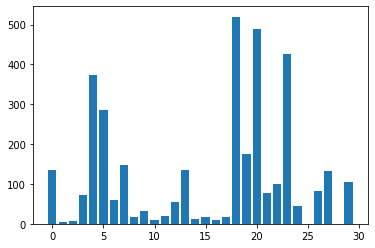

In [25]:
########### Attempt to find the top best features to use ###########

X = df_ohe_friendly.drop(['Churn_Yes','MonthlyCharges','TotalCharges','tenure'], axis = 1)
y = df_ohe_friendly['Churn_Yes']

from sklearn.feature_selection import SelectKBest, chi2

fs = SelectKBest(score_func = chi2, k='all')
fs.fit(X,y)
X_fs = fs.transform(X)

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)

# [i for i in fs.scores_ if i >= 250]
selected_feature_index = fs.scores_ > 250
selected_feature = X.columns[selected_feature_index.tolist()].tolist()
selected_feature


In [26]:
### testing for feature selection for the continuous variables of 'MonthlyCharges','TotalCharges','tenure'
from scipy.stats import f_oneway

var_list = ['MonthlyCharges','TotalCharges','tenure']

for var in var_list:
    set_a = df[df['Churn'] == 'Yes'][var]
    set_b = df[df['Churn'] != 'Yes'][var]
    f, p = f_oneway(set_a, set_b)
    print(var, ": ", p)

MonthlyCharges :  2.7066456068950115e-60
TotalCharges :  2.127211613245422e-63
tenure :  7.999057960610892e-205


Observations:
- given that the above p-values are lesser than 0.05, we can reject the null hypothesis that the means of each attribute for the classes Yes and No for 'Churn' are the same and say there's evidence that the means are different.

In [27]:
selected_features = selected_feature + var_list
df_ohe_friendly[selected_features]

InternetService_Fiber optic  InternetService_No  \
0                               0                   0   
1                               0                   0   
2                               0                   0   
3                               0                   0   
4                               1                   0   
...                           ...                 ...   
7038                            0                   0   
7039                            1                   0   
7040                            0                   0   
7041                            1                   0   
7042                            1                   0   

      Contract_Month-to-month  Contract_Two year  \
0                           1                  0   
1                           0                  0   
2                           1                  0   
3                           0                  0   
4                           1                  0   
...                       ...                ...   
7038                        0                  0   
7039                        0                  0   
7040                        1                  0   
7041                        1                  0   
7042                        0                  1   

      PaymentMethod_Electronic check  MonthlyCharges  TotalCharges  tenure  
0                                  1           29.85         29.85       1  
1                                  0           56.95       1889.50      34  
2                                  0           53.85        108.15       2  
3                                  0           42.30       1840.75      45  
4                                  1           70.70        151.65       2  
...                              ...             ...           ...     ...  
7038                               0           84.80       1990.50      24  
7039                               0          103.20       7362.90      72  
7040                               1           29.60        346.45      11  
7041                               0           74.40        306.60       4  
7042                               0          105.65       6844.50      66  

[7043 rows x 8 columns]

The above data set can be preserved for an alternative attempt.

## 2.1. Adjusted Final Selection

The code chunk above helped us determine the features to be used based on the Feature Importance. This segment revisits the bar plots of the categorical features with the hue of the target variable. In turn, it generated some alternative features that can be used. Namely, we use the attributes that most describe the 2 classes of the dependent variable. 

In [28]:
df_ohe_friendly[['InternetService_Fiber optic','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No'
                 ,'TechSupport_No','Contract_Month-to-month','PaymentMethod_Electronic check','StreamingMovies_No'
                 ,'Dependents_Yes','PhoneService_Yes','PaperlessBilling_Yes','Churn_Yes'] + var_list]

InternetService_Fiber optic  OnlineSecurity_No  OnlineBackup_No  \
0                               0                  1                0   
1                               0                  0                1   
2                               0                  0                0   
3                               0                  0                1   
4                               1                  1                1   
...                           ...                ...              ...   
7038                            0                  0                1   
7039                            1                  1                0   
7040                            0                  0                1   
7041                            1                  1                1   
7042                            1                  0                1   

      DeviceProtection_No  TechSupport_No  Contract_Month-to-month  \
0                       1               1                        1   
1                       0               1                        0   
2                       1               1                        1   
3                       0               0                        0   
4                       1               1                        1   
...                   ...             ...                      ...   
7038                    0               0                        0   
7039                    0               1                        0   
7040                    1               1                        1   
7041                    1               1                        1   
7042                    0               0                        0   

      PaymentMethod_Electronic check  StreamingMovies_No  Dependents_Yes  \
0                                  1                   1               0   
1                                  0                   1               0   
2                                  0                   1               0   
3                                  0                   1               0   
4                                  1                   1               0   
...                              ...                 ...             ...   
7038                               0                   0               1   
7039                               0                   0               1   
7040                               1                   1               1   
7041                               0                   1               0   
7042                               0                   0               0   

      PhoneService_Yes  PaperlessBilling_Yes  Churn_Yes  MonthlyCharges  \
0                    0                     1          0           29.85   
1                    1                     0          0           56.95   
2                    1                     1          1           53.85   
3                    0                     0          0           42.30   
4                    1                     1          1           70.70   
...                ...                   ...        ...             ...   
7038                 1                     1          0           84.80   
7039                 1                     1          0          103.20   
7040                 0                     1          0           29.60   
7041                 1                     1          1           74.40   
7042                 1                     1          0          105.65   

      TotalCharges  tenure  
0            29.85       1  
1          1889.50      34  
2           108.15       2  
3          1840.75      45  
4           151.65       2  
...            ...     ...  
7038       1990.50      24  
7039       7362.90      72  
7040        346.45      11  
7041        306.60       4  
7042       6844.50      66  

[7043 rows x 15 columns]

In [29]:
df_ohe_friendly.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'PaperlessBilling_Yes', 'Churn_Yes'],
      dtype='object')

In [30]:
selected_features2 = ['InternetService_Fiber optic','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No'
                 ,'TechSupport_No','Contract_Month-to-month','PaymentMethod_Electronic check','StreamingMovies_No'
                 ,'Dependents_Yes','PhoneService_Yes','PaperlessBilling_Yes'] + var_list
selected_features2

['InternetService_Fiber optic',
 'OnlineSecurity_No',
 'OnlineBackup_No',
 'DeviceProtection_No',
 'TechSupport_No',
 'Contract_Month-to-month',
 'PaymentMethod_Electronic check',
 'StreamingMovies_No',
 'Dependents_Yes',
 'PhoneService_Yes',
 'PaperlessBilling_Yes',
 'MonthlyCharges',
 'TotalCharges',
 'tenure']

## 2.2. Added Study to the Features

In [31]:
## Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Get variables for which to compute VIF and add intercept term
features_to_drop = ['MonthlyCharges']
X_vif = df_ohe_friendly[selected_features2].drop(features_to_drop, axis = 1)
X_vif['Intercept'] = 1 # Reason to add a constant is found here: https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python

## Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

## View results using print
print(vif)


## Resources
## - https://github.com/statsmodels/statsmodels/issues/2376

                         variables        VIF
0      InternetService_Fiber optic   2.181206
1                OnlineSecurity_No   1.351962
2                  OnlineBackup_No   1.425647
3              DeviceProtection_No   1.499963
4                   TechSupport_No   1.428268
5          Contract_Month-to-month   2.098848
6   PaymentMethod_Electronic check   1.264943
7               StreamingMovies_No   1.618248
8                   Dependents_Yes   1.080819
9                 PhoneService_Yes   1.216408
10            PaperlessBilling_Yes   1.177361
11                    TotalCharges   9.450591
12                          tenure   6.254508
13                       Intercept  31.829146


Observation:
- No VIF scores above 10. Hence, it is acceptable.

In [32]:
df_ohe_friendly[selected_features2].corr()

InternetService_Fiber optic  \
InternetService_Fiber optic                        1.000000   
OnlineSecurity_No                                  0.030696   
OnlineBackup_No                                   -0.165651   
DeviceProtection_No                               -0.176049   
TechSupport_No                                     0.020492   
Contract_Month-to-month                            0.244164   
PaymentMethod_Electronic check                     0.336410   
StreamingMovies_No                                -0.322923   
Dependents_Yes                                    -0.165818   
PhoneService_Yes                                   0.289999   
PaperlessBilling_Yes                               0.326853   
MonthlyCharges                                     0.787066   
TotalCharges                                       0.361655   
tenure                                             0.019720   

                                OnlineSecurity_No  OnlineBackup_No  \
InternetService_Fiber optic              0.030696        -0.165651   
OnlineSecurity_No                        1.000000         0.283832   
OnlineBackup_No                          0.283832         1.000000   
DeviceProtection_No                      0.275438         0.303546   
TechSupport_No                           0.354931         0.294233   
Contract_Month-to-month                  0.246679         0.164172   
PaymentMethod_Electronic check           0.112338         0.000408   
StreamingMovies_No                       0.187398         0.274501   
Dependents_Yes                          -0.080972        -0.023671   
PhoneService_Yes                         0.092893         0.052312   
PaperlessBilling_Yes                     0.003636        -0.126735   
MonthlyCharges                          -0.296594        -0.441780   
TotalCharges                            -0.411651        -0.509226   
tenure                                  -0.327203        -0.360277   

                                DeviceProtection_No  TechSupport_No  \
InternetService_Fiber optic               -0.176049        0.020492   
OnlineSecurity_No                          0.275438        0.354931   
OnlineBackup_No                            0.303546        0.294233   
DeviceProtection_No                        1.000000        0.333313   
TechSupport_No                             0.333313        1.000000   
Contract_Month-to-month                    0.225662        0.285241   
PaymentMethod_Electronic check             0.003351        0.114839   
StreamingMovies_No                         0.402111        0.279358   
Dependents_Yes                            -0.013963       -0.063268   
PhoneService_Yes                           0.071227        0.096340   
PaperlessBilling_Yes                      -0.103797       -0.037880   
MonthlyCharges                            -0.482692       -0.338304   
TotalCharges                              -0.521983       -0.431883   
tenure                                    -0.360653       -0.324221   

                                Contract_Month-to-month  \
InternetService_Fiber optic                    0.244164   
OnlineSecurity_No                              0.246679   
OnlineBackup_No                                0.164172   
DeviceProtection_No                            0.225662   
TechSupport_No                                 0.285241   
Contract_Month-to-month                        1.000000   
PaymentMethod_Electronic check                 0.331661   
StreamingMovies_No                             0.116633   
Dependents_Yes                                -0.231720   
PhoneService_Yes                              -0.000742   
PaperlessBilling_Yes                           0.169096   
MonthlyCharges                                 0.060165   
TotalCharges                                  -0.444255   
tenure                                        -0.645561   

                                PaymentMethod_Electronic check  \
InternetService_F

# 3. Model Training
## 3.1. Logistic Regression

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import logit
from sklearn.model_selection import train_test_split

X = df_ohe_friendly[selected_features2]
y = df_ohe_friendly['Churn_Yes']

##### Key Variables #####
random_state = 10
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

############## TRAIN ##############

mod = sm.Logit(y_train, sm.add_constant(X_train))
res = mod.fit(maxiter = 50)

print(res.summary())
print(pd.DataFrame(res.pred_table()))


############## TEST ##############

from sklearn.metrics import confusion_matrix

predict = res.predict(sm.add_constant(X_test))
predict = [i > 0.5 for i in predict]

print(pd.DataFrame(confusion_matrix(y_pred = predict, y_true = y_test)))



Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5619
Method:                           MLE   Df Model:                           14
Date:                Wed, 08 Dec 2021   Pseudo R-squ.:                     inf
Time:                        23:27:33   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.4722      0.364     -9.541      0.00

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning:

overflow encountered in exp

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning:

divide by zero encountered in log

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Library/Frameworks/Python.framework

### 3.1.1. Removing Statistically Insignificant Attributes

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import logit
from sklearn.model_selection import train_test_split

X = df_ohe_friendly[selected_features2].drop(['InternetService_Fiber optic','StreamingMovies_No','Dependents_Yes'], axis = 1)
y = df_ohe_friendly['Churn_Yes']

##### Key Variables #####
random_state = 10
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

############## TRAIN ##############

mod = sm.Logit(y_train, sm.add_constant(X_train))
res = mod.fit(maxiter = 50)

print(res.summary())
print(pd.DataFrame(res.pred_table()))


############## TEST ##############

from sklearn.metrics import confusion_matrix

predict = res.predict(sm.add_constant(X_test))
predict = [i > 0.5 for i in predict]

print(pd.DataFrame(confusion_matrix(y_pred = predict, y_true = y_test)))



Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5622
Method:                           MLE   Df Model:                           11
Date:                Wed, 08 Dec 2021   Pseudo R-squ.:                     inf
Time:                        23:27:33   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.5482      0.233    -15.221      0.00

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning:

overflow encountered in exp

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning:

divide by zero encountered in log

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Library/Frameworks/Python.framework

### 3.1.2. Replicating the above with LogisticRegression from SKLearn


TRAIN
      0    1
0  3671  437
1   672  854
Train Accuracy Score: 0.80
Mean Train Accuracy Score with CV: 0.80

TEST
     0    1
0  951  115
1  158  185
Test Accuracy Score: 0.81
No Skills AUC: 0.50
Logistic Regression AUC: 0.84


              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1066
           1       0.62      0.54      0.58       343

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.72      1409
weighted avg       0.80      0.81      0.80      1409



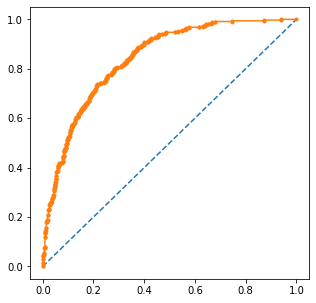

In [35]:
from sklearn.linear_model import LogisticRegression

############# TRAIN #############
mod = LogisticRegression(random_state = 10, max_iter = 1000, fit_intercept=True, penalty='none', solver='newton-cg')
res = mod.fit(X_train, y_train)
y_pred_lr = res.predict(X_test)

print("\nTRAIN")
print(pd.DataFrame(confusion_matrix(y_pred = res.predict(X_train), y_true = y_train)))
print('Train Accuracy Score: {:.2f}'.format(res.score(X_train, y_train)))


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = random_state)
n_scores = cross_val_score(mod, X_train, y_train, cv = skfold, n_jobs = -1)
print('Mean Train Accuracy Score with CV: {:.2f}'.format(np.mean(n_scores)))

############# TEST #############
print("\nTEST")

print(pd.DataFrame(confusion_matrix(y_pred = res.predict(X_test), y_true = y_test)))
print('Test Accuracy Score: {:.2f}'.format(res.score(X_test, y_test)))


from sklearn.metrics import roc_curve, roc_auc_score
ns_probs = [0 for _ in list(range(len(y_test)))]
res_probs = res.predict_proba(X_test)[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)
res_auc = roc_auc_score(y_test, res_probs)
print('No Skills AUC: {:.2f}'.format(ns_auc))
print('Logistic Regression AUC: {:.2f}'.format(res_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
res_fpr, res_tpr, _ = roc_curve(y_test, res_probs)

plt.figure(figsize=(5,5))

plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'No Skill')
plt.plot(res_fpr, res_tpr, marker = '.', label = 'Logistic Regression')

from sklearn.metrics import classification_report
print('\n')
print(classification_report(y_test, y_pred_lr))

## 3.2. Random Forest Classifier

In [36]:
X = df_ohe_friendly[selected_features2].drop(['InternetService_Fiber optic','StreamingMovies_No','Dependents_Yes'], axis = 1)
y = df_ohe_friendly['Churn_Yes']

##### Key Variables #####
random_state = 10
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)


TRAIN
      0    1
0  3899  209
1   979  547
Train Accuracy Score: 0.79
Mean Train Accuracy Score with CV: 0.79

TEST
      0    1
0  1011   55
1   230  113
Test Accuracy Score: 0.80
No Skills AUC: 0.50
Random Forest AUC: 0.83


              precision    recall  f1-score   support

           0       0.81      0.95      0.88      1066
           1       0.67      0.33      0.44       343

    accuracy                           0.80      1409
   macro avg       0.74      0.64      0.66      1409
weighted avg       0.78      0.80      0.77      1409



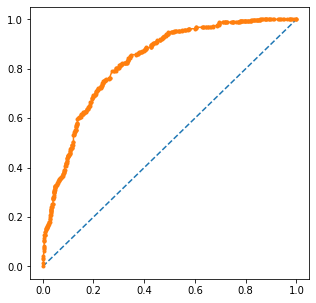

In [37]:
from sklearn.ensemble import RandomForestClassifier

mod = RandomForestClassifier(random_state = random_state, max_depth = 3)
res = mod.fit(X_train, y_train)
y_pred_rf = res.predict(X_test)

print("\nTRAIN")
print(pd.DataFrame(confusion_matrix(y_pred = res.predict(X_train), y_true = y_train)))
print('Train Accuracy Score: {:.2f}'.format(res.score(X_train, y_train)))


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = random_state)
n_scores = cross_val_score(mod, X_train, y_train, cv = skfold, n_jobs = -1)
print('Mean Train Accuracy Score with CV: {:.2f}'.format(np.mean(n_scores)))

############# TEST #############
print("\nTEST")

print(pd.DataFrame(confusion_matrix(y_pred = y_pred_rf, y_true = y_test)))
print('Test Accuracy Score: {:.2f}'.format(res.score(X_test, y_test)))


from sklearn.metrics import roc_curve, roc_auc_score
ns_probs = [0 for _ in list(range(len(y_test)))]
res_probs = res.predict_proba(X_test)[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)
res_auc = roc_auc_score(y_test, res_probs)
print('No Skills AUC: {:.2f}'.format(ns_auc))
print('Random Forest AUC: {:.2f}'.format(res_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
res_fpr, res_tpr, _ = roc_curve(y_test, res_probs)

plt.figure(figsize=(5,5))

plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'No Skill')
plt.plot(res_fpr, res_tpr, marker = '.', label = 'Random Forest')

from sklearn.metrics import classification_report
print('\n')
print(classification_report(y_test, y_pred_rf))

## 3.3. AdaBoost


TRAIN
      0    1
0  3694  414
1   662  864
Train Accuracy Score: 0.81
Mean Train Accuracy Score with CV: 0.80

TEST
     0    1
0  940  126
1  161  182
Test Accuracy Score: 0.80
No Skills AUC: 0.50
AdaBoost AUC: 0.84


              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1066
           1       0.59      0.53      0.56       343

    accuracy                           0.80      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.79      0.80      0.79      1409



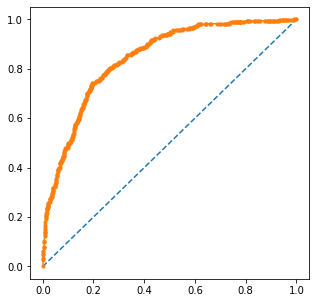

In [38]:
from sklearn.ensemble import AdaBoostClassifier

mod = AdaBoostClassifier(n_estimators=100, random_state=random_state)
res = mod.fit(X_train, y_train)
y_pred_ada = res.predict(X_test)

print("\nTRAIN")
print(pd.DataFrame(confusion_matrix(y_pred = res.predict(X_train), y_true = y_train)))
print('Train Accuracy Score: {:.2f}'.format(res.score(X_train, y_train)))


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = random_state)
n_scores = cross_val_score(mod, X_train, y_train, cv = skfold, n_jobs = -1)
print('Mean Train Accuracy Score with CV: {:.2f}'.format(np.mean(n_scores)))

############# TEST #############
print("\nTEST")

print(pd.DataFrame(confusion_matrix(y_pred = y_pred_ada, y_true = y_test)))
print('Test Accuracy Score: {:.2f}'.format(res.score(X_test, y_test)))


from sklearn.metrics import roc_curve, roc_auc_score
ns_probs = [0 for _ in list(range(len(y_test)))]
res_probs = res.predict_proba(X_test)[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)
res_auc = roc_auc_score(y_test, res_probs)
print('No Skills AUC: {:.2f}'.format(ns_auc))
print('AdaBoost AUC: {:.2f}'.format(res_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
res_fpr, res_tpr, _ = roc_curve(y_test, res_probs)

plt.figure(figsize=(5,5))

plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'No Skill')
plt.plot(res_fpr, res_tpr, marker = '.', label = 'AdaBoost')

from sklearn.metrics import classification_report
print('\n')
print(classification_report(y_test, y_pred_ada))

## 3.4. XGBoost

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:27:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

TRAIN
      0    1
0  3737  371
1   655  871
Train Accuracy Score: 0.82
Mean Train Accuracy Score with CV: 0.80

TEST
     0    1
0  956  110
1  165  178
Test Accuracy Score: 0.80
No Skills AUC: 0.50
XGBoost AUC: 0.84


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1066
           1       0.62      0.52      0.56       343

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.80      0.80      0.80      1409



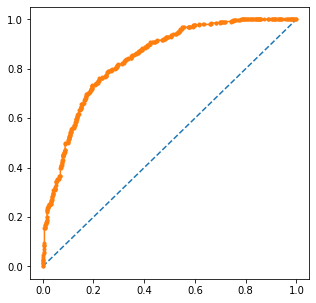

In [39]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

dmatrix = xgb.DMatrix(data = X_train,label = y_train)

# mod = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.3, 
#                           max_depth = 2, alpha = 0.1, n_estimators = 1000, gamma = 1)
mod = xgb.XGBClassifier(random_state = random_state, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
res = mod.fit(X_train, y_train)
y_pred_xgb = res.predict(X_test)

print("\nTRAIN")
print(pd.DataFrame(confusion_matrix(y_pred = res.predict(X_train), y_true = y_train)))
print('Train Accuracy Score: {:.2f}'.format(res.score(X_train, y_train)))


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = random_state)
n_scores = cross_val_score(mod, X_train, y_train, cv = skfold, n_jobs = -1)
print('Mean Train Accuracy Score with CV: {:.2f}'.format(np.mean(n_scores)))

############# TEST #############
print("\nTEST")

print(pd.DataFrame(confusion_matrix(y_pred = y_pred_xgb, y_true = y_test)))
print('Test Accuracy Score: {:.2f}'.format(res.score(X_test, y_test)))


from sklearn.metrics import roc_curve, roc_auc_score
ns_probs = [0 for _ in list(range(len(y_test)))]
res_probs = res.predict_proba(X_test)[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)
res_auc = roc_auc_score(y_test, res_probs)
print('No Skills AUC: {:.2f}'.format(ns_auc))
print('XGBoost AUC: {:.2f}'.format(res_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
res_fpr, res_tpr, _ = roc_curve(y_test, res_probs)

plt.figure(figsize=(5,5))

plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'No Skill')
plt.plot(res_fpr, res_tpr, marker = '.', label = 'XGBoost')

from sklearn.metrics import classification_report
print('\n')
print(classification_report(y_test, y_pred_xgb))

## 3.5. Model Stacking

### 3.5.1. Model Correlation

This section is to determine how diverse our end results are for the test models so that we can stack them together in the VecStack package.

In [40]:
pd.DataFrame({'logisticRegression':y_pred_lr
             ,'randomForest':y_pred_rf
             ,'adaBoost':y_pred_ada
             ,'xgBoost':y_pred_xgb}).corr()

logisticRegression  randomForest  adaBoost   xgBoost
logisticRegression            1.000000      0.680665  0.844932  0.832665
randomForest                  0.680665      1.000000  0.690345  0.720467
adaBoost                      0.844932      0.690345  1.000000  0.873155
xgBoost                       0.832665      0.720467  0.873155  1.000000

Seems from the above that the least correlated models are random forest and logistic regrsession (0.72). Hence, we'll use these 2 as the L1 for stacking and then use XGboost for L2.

In [41]:
from vecstack import stacking
from xgboost import XGBClassifier

models = [
    LogisticRegression(random_state = 10, max_iter = 1000, fit_intercept=True, penalty='none', solver='newton-cg')
    , RandomForestClassifier(random_state = random_state, max_depth = 3)
    , XGBClassifier(random_state = random_state, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    , AdaBoostClassifier(n_estimators=100, random_state=random_state)
]

In [42]:
from sklearn.metrics import accuracy_score

S_train, S_test = stacking(models
                           , X_train, y_train, X_test,
                           regression = False
                           , mode = 'oof_pred_bag' #variant A
                           , needs_proba = False
                           , save_dir = None
                           , metric = accuracy_score
                           , n_folds = 4
                           , stratified = True
                           , shuffle = True
                           , random_state = random_state
                           , verbose = 2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [LogisticRegression]
    fold  0:  [0.80127750]
    fold  1:  [0.79772889]
    fold  2:  [0.81463068]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed



    fold  3:  [0.78906250]
    ----
    MEAN:     [0.80067489] + [0.00920127]
    FULL:     [0.80067448]

model  1:     [RandomForestClassifier]
    fold  0:  [0.77359830]
    fold  1:  [0.79134138]
    fold  2:  [0.80113636]
    fold  3:  [0.78693182]
    ----
    MEAN:     [0.78825196] + [0.00989981]
    FULL:     [0.78824991]

model  2:     [XGBClassifier]
[23:27:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    fold  0:  [0.79630944]
[23:27:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



    fold  1:  [0.80411639]
[23:27:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    fold  2:  [0.81392045]
[23:27:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



    fold  3:  [0.78693182]
    ----
    MEAN:     [0.80031953] + [0.00993369]
    FULL:     [0.80031949]

model  3:     [AdaBoostClassifier]
    fold  0:  [0.80127750]
    fold  1:  [0.80553584]
    fold  2:  [0.80042614]
    fold  3:  [0.79119318]
    ----
    MEAN:     [0.79960817] + [0.00522984]
    FULL:     [0.79960951]



In [43]:
model = XGBClassifier(random_state = random_state, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)

# model = AdaBoostClassifier(n_estimators=100, random_state=random_state)

model = model.fit(S_train, y_train)

y_pred_stack = model.predict(S_test)

############# TEST #############
print("\nTEST")

print(pd.DataFrame(confusion_matrix(y_pred = y_pred_stack, y_true = y_test)))

[23:27:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

TEST
     0    1
0  966  100
1  172  171


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



## 3.6. Naive Bayes Classifier
1) From SKLearn, there are various NB classifiers to use and they are dependent on the input data that we have.

For Classification, we'll use CategoricalNB. For continuous data, we'll use GaussianNB.


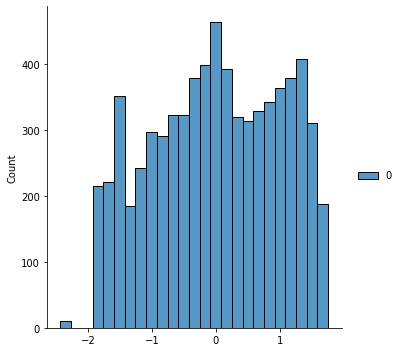

In [44]:
## We want to make the continuous variables more gaussian like. Let's apply Yeo-Johnson transformation

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
test_trsf = pt.fit_transform(df_ohe_friendly[['TotalCharges']])

# sns.distplot(np.log(df_ohe_friendly['TotalCharges']+1))
sns.displot(test_trsf)

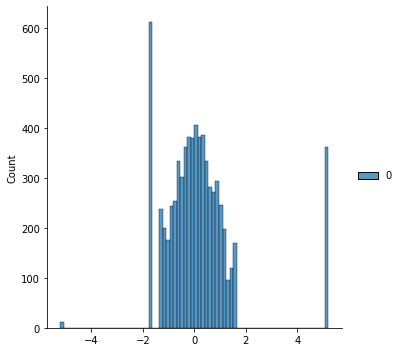

In [45]:
## Apply Quantile Transformation on tenure
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution = 'normal')
test_trsf = qt.fit_transform(df_ohe_friendly[['tenure']])

sns.displot(test_trsf)

In [46]:
df_ohe_friendly[selected_features2].drop(['DeviceProtection_No','Dependents_Yes','MonthlyCharges','TotalCharges','tenure'], axis = 1) #grouping of cate

InternetService_Fiber optic  OnlineSecurity_No  OnlineBackup_No  \
0                               0                  1                0   
1                               0                  0                1   
2                               0                  0                0   
3                               0                  0                1   
4                               1                  1                1   
...                           ...                ...              ...   
7038                            0                  0                1   
7039                            1                  1                0   
7040                            0                  0                1   
7041                            1                  1                1   
7042                            1                  0                1   

      TechSupport_No  Contract_Month-to-month  PaymentMethod_Electronic check  \
0                  1                        1                               1   
1                  1                        0                               0   
2                  1                        1                               0   
3                  0                        0                               0   
4                  1                        1                               1   
...              ...                      ...                             ...   
7038               0                        0                               0   
7039               1                        0                               0   
7040               1                        1                               1   
7041               1                        1                               0   
7042               0                        0                               0   

      StreamingMovies_No  PhoneService_Yes  PaperlessBilling_Yes  
0                      1                 0                     1  
1                      1                 1                     0  
2                      1                 1                     1  
3                      1                 0                     0  
4                      1                 1                     1  
...                  ...               ...                   ...  
7038                   0                 1                     1  
7039                   0                 1                     1  
7040                   1                 0                     1  
7041                   1                 1                     1  
7042                   0                 1                     1  

[7043 rows x 9 columns]

Classes:  [0 1]
Class Priors:  [0.72914448 0.27085552]
--------------------------------------------------------
Accuracy Score:  0.7899219304471257
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1066
           1       0.57      0.53      0.55       343

    accuracy                           0.79      1409
   macro avg       0.71      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409

     0    1
0  932  134
1  162  181
No Skills AUC: 0.50
Naive Bayes AUC: 0.81


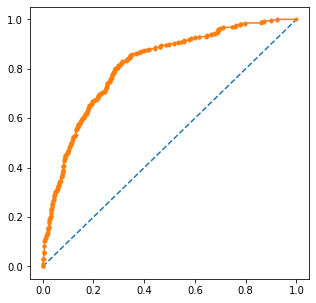

In [47]:
# X_cat = df_ohe_friendly[selected_feature] #grouping of categorical values
X_cat = df_ohe_friendly[selected_features2].drop(['DeviceProtection_No','Dependents_Yes','MonthlyCharges','TotalCharges','tenure'], axis = 1) #grouping of categorical values
X_cont = df_ohe_friendly[['TotalCharges','tenure']] # grouping of continuous values
y = df_ohe_friendly['Churn_Yes']

X = pd.concat([X_cat, X_cont], axis = 1)

############## TRANSFORMATION ##############
## 1) Yeo-Johnson Transformation on TotalCharges
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
test_trsf = pt.fit_transform(df_ohe_friendly[['TotalCharges']])
X['TotalCharges_pt'] = test_trsf

## 2) QuantileTransformer on 'tenure'
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution = 'normal')
test_trsf = qt.fit_transform(df_ohe_friendly[['tenure']])
X['tenure_qt'] = test_trsf

X.drop(['TotalCharges','tenure'], axis = 1, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

############### Fit the 2 models (1. Categorical, 2. Gaussian) #############
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

count_of_categorical = len(X_cat.columns)

model_G = GaussianNB()
clf_G = model_G.fit(X_train.iloc[:,count_of_categorical:], y_train)

model_C = CategoricalNB()
clf_C = model_C.fit(X_train.iloc[:,:count_of_categorical], y_train)


G_train_probas = clf_G.predict_proba(X_train.iloc[:,count_of_categorical:])
C_train_probas = clf_C.predict_proba(X_train.iloc[:,:count_of_categorical])

G_test_probas = clf_G.predict_proba(X_test.iloc[:,count_of_categorical:])
C_test_probas = clf_C.predict_proba(X_test.iloc[:,:count_of_categorical])


X_new_train = np.c_[(G_train_probas[:,1], C_train_probas[:,1])]
X_new_test = np.c_[(G_test_probas[:,1], C_test_probas[:,1])]


############## Final Model to get the outcome of both a Gaussian and Categorical NB ################
model = GaussianNB()
clf = model.fit(X_new_train, y_train)

pred_labels = clf.predict(X_new_test)

from sklearn.metrics import classification_report

# ----- Print results -----
print('Classes: ', clf.classes_) # class labels known to the classifier
print('Class Priors: ',clf.class_prior_) # probability of each class.
# Use score method to get accuracy of model
print('--------------------------------------------------------')
score = clf.score(X_new_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels))
print(pd.DataFrame(confusion_matrix(y_pred = pred_labels, y_true = y_test)))


from sklearn.metrics import roc_curve, roc_auc_score
ns_probs = [0 for _ in list(range(len(y_test)))]
rf_probs = clf.predict_proba(X_new_test)[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
print('No Skills AUC: {:.2f}'.format(ns_auc))
print('Naive Bayes AUC: {:.2f}'.format(rf_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize = (5,5))

plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'No Skill')
plt.plot(rf_fpr, rf_tpr, marker = '.', label = 'Naive Bayes')

### 3.3.1. Error Analysis

For this section, we won't be using the Tools provided by Responsible AI. Instead, we'll do our own Error Analysis based on the examples used for the Responsible AI.

In [48]:
nb_prediction_results = pd.DataFrame({'y_pred':pred_labels.tolist()
                                      ,'y_true':y_test})

nb_error_index = nb_prediction_results[nb_prediction_results['y_pred']!=nb_prediction_results['y_true']].index

In [49]:
nb_error_analysis_df = X_test.loc[nb_error_index]
nb_error_analysis_df = pd.concat([nb_error_analysis_df,nb_prediction_results.loc[nb_error_index]], axis = 1)
nb_error_analysis_df['error_type'] = np.where(nb_error_analysis_df['y_pred']==1,'FP','FN')
nb_error_analysis_df

InternetService_Fiber optic  OnlineSecurity_No  OnlineBackup_No  \
5255                            1                  1                1   
6035                            1                  1                0   
4523                            1                  0                1   
842                             0                  1                1   
893                             0                  1                1   
...                           ...                ...              ...   
1212                            1                  1                1   
3603                            0                  1                1   
3883                            1                  0                1   
5599                            1                  1                0   
5938                            1                  1                0   

      TechSupport_No  Contract_Month-to-month  PaymentMethod_Electronic check  \
5255               1                        1                               1   
6035               0                        0                               1   
4523               1                        1                               1   
842                1                        0                               0   
893                1                        1                               1   
...              ...                      ...                             ...   
1212               1                        1                               1   
3603               1                        1                               0   
3883               1                        1                               1   
5599               0                        1                               0   
5938               0                        1                               1   

      StreamingMovies_No  PhoneService_Yes  PaperlessBilling_Yes  \
5255                   1                 1                     1   
6035                   0                 1                     1   
4523                   1                 1                     0   
842                    1                 1                     0   
893                    1                 0                     0   
...                  ...               ...                   ...   
1212                   1                 1                     1   
3603                   1                 1                     0   
3883                   1                 1                     1   
5599                   1                 1                     1   
5938                   0                 1                     1   

      TotalCharges_pt  tenure_qt  y_pred  y_true error_type  
5255         0.390444   0.053973       1       0         FP  
6035         1.587746   1.079690       0       1         FN  
4523        -0.433421  -0.607463       1       0         FP  
842         -1.055735  -0.519225       0       1         FN  
893         -1.843965  -1.694923       0       1         FN  
...               ...        ...     ...     ...        ...  
1212        -0.628508  -0.773140       1       0         FP  
3603        -1.481968  -1.250242       0       1         FN  
3883        -0.217492  -0.519225       1       0         FP  
5599        -0.296412  -0.659602       0       1         FN  
5938         0.826758   0.124523       1       0         FP  

[296 rows x 14 columns]

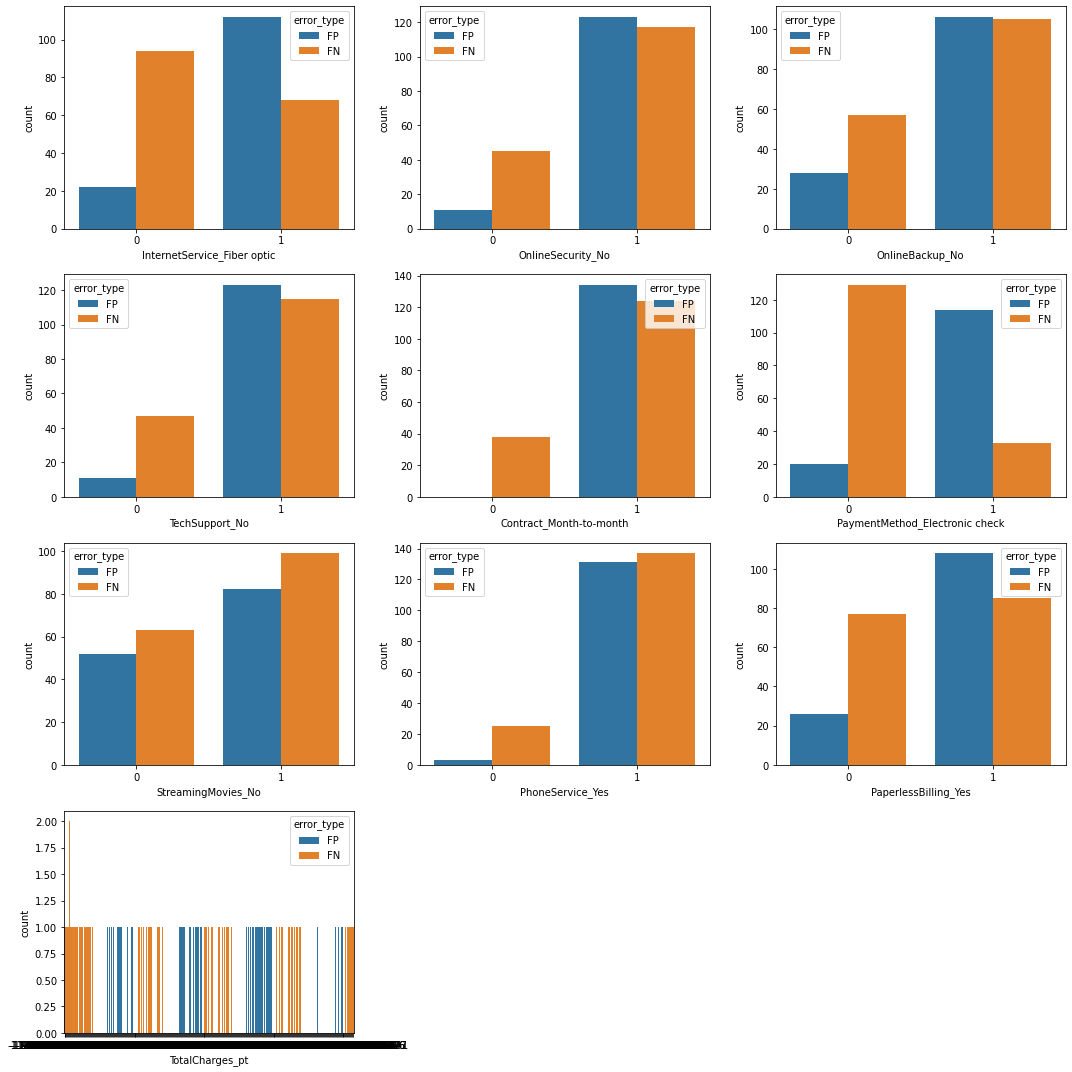

In [50]:
i = 1

plt.figure(figsize = (15,15))

for col in nb_error_analysis_df.columns[:10]:
    if col != 'TotalCharges_pct' and col != 'tenure_qt':
        plt.subplot(4, 3, i)
        sns.countplot(x = col, hue = 'error_type', data = nb_error_analysis_df)
        i += 1
        
plt.tight_layout()

In [51]:
nb_error_analysis_df[nb_error_analysis_df['PhoneService_Yes']==1]

InternetService_Fiber optic  OnlineSecurity_No  OnlineBackup_No  \
5255                            1                  1                1   
6035                            1                  1                0   
4523                            1                  0                1   
842                             0                  1                1   
5791                            1                  1                0   
...                           ...                ...              ...   
1212                            1                  1                1   
3603                            0                  1                1   
3883                            1                  0                1   
5599                            1                  1                0   
5938                            1                  1                0   

      TechSupport_No  Contract_Month-to-month  PaymentMethod_Electronic check  \
5255               1                        1                               1   
6035               0                        0                               1   
4523               1                        1                               1   
842                1                        0                               0   
5791               1                        1                               1   
...              ...                      ...                             ...   
1212               1                        1                               1   
3603               1                        1                               0   
3883               1                        1                               1   
5599               0                        1                               0   
5938               0                        1                               1   

      StreamingMovies_No  PhoneService_Yes  PaperlessBilling_Yes  \
5255                   1                 1                     1   
6035                   0                 1                     1   
4523                   1                 1                     0   
842                    1                 1                     0   
5791                   0                 1                     1   
...                  ...               ...                   ...   
1212                   1                 1                     1   
3603                   1                 1                     0   
3883                   1                 1                     1   
5599                   1                 1                     1   
5938                   0                 1                     1   

      TotalCharges_pt  tenure_qt  y_pred  y_true error_type  
5255         0.390444   0.053973       1       0         FP  
6035         1.587746   1.079690       0       1         FN  
4523        -0.433421  -0.607463       1       0         FP  
842         -1.055735  -0.519225       0       1         FN  
5791         1.417919   0.939747       1       0         FP  
...               ...        ...     ...     ...        ...  
1212        -0.628508  -0.773140       1       0         FP  
3603        -1.481968  -1.250242       0       1         FN  
3883        -0.217492  -0.519225       1       0         FP  
5599        -0.296412  -0.659602       0       1         FN  
5938         0.826758   0.124523       1       0         FP  

[268 rows x 14 columns]

## 3.7. Support Vector Machine (SVM)

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear','rbf','poly','sigmoid')
              ,'C':(1,3,10)
              ,'degree':(2,3,4,5,6)}
mod = SVC(random_state = random_state)
modGS = GridSearchCV(mod, parameters,scoring = 'recall')
res = modGS.fit(X_train, y_train)

print(res.best_params_)

{'C': 10, 'degree': 2, 'kernel': 'poly'}



TRAIN
      0    1
0  3680  428
1   691  835
Train Accuracy Score: 0.80
Mean Train Accuracy Score with CV: 0.80

TEST
     0    1
0  945  121
1  157  186
Test Accuracy Score: 0.80
No Skills AUC: 0.50
Support Vector AUC: 0.81


              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1066
           1       0.61      0.54      0.57       343

    accuracy                           0.80      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.80      0.80      0.80      1409



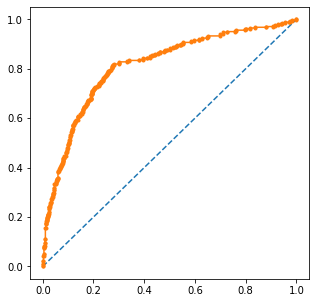

In [53]:
mod = SVC(random_state = random_state, C = 10, degree = 2, kernel = 'poly', probability = True)
res = mod.fit(X_train, y_train)
y_predict_modGS = res.predict(X_test)

print("\nTRAIN")
print(pd.DataFrame(confusion_matrix(y_pred = res.predict(X_train), y_true = y_train)))
print('Train Accuracy Score: {:.2f}'.format(res.score(X_train, y_train)))


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = random_state)
n_scores = cross_val_score(mod, X_train, y_train, cv = skfold, n_jobs = -1)
print('Mean Train Accuracy Score with CV: {:.2f}'.format(np.mean(n_scores)))

############# TEST #############
print("\nTEST")

print(pd.DataFrame(confusion_matrix(y_pred = y_predict_modGS, y_true = y_test)))
print('Test Accuracy Score: {:.2f}'.format(res.score(X_test, y_test)))


from sklearn.metrics import roc_curve, roc_auc_score
ns_probs = [0 for _ in list(range(len(y_test)))]
res_probs = res.predict_proba(X_test)[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)
res_auc = roc_auc_score(y_test, res_probs)
print('No Skills AUC: {:.2f}'.format(ns_auc))
print('Support Vector AUC: {:.2f}'.format(res_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
res_fpr, res_tpr, _ = roc_curve(y_test, res_probs)

plt.figure(figsize=(5,5))

plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'No Skill')
plt.plot(res_fpr, res_tpr, marker = '.', label = 'Support Vector')

from sklearn.metrics import classification_report
print('\n')
print(classification_report(y_test, y_predict_modGS))

# 4. Model Diagnosis

Use this section to determine what should be the next steps of the model by plotting out the learning curve.

In [54]:
X = df_ohe_friendly[selected_features2].drop(['InternetService_Fiber optic','StreamingMovies_No','Dependents_Yes'], axis = 1)
y = df_ohe_friendly['Churn_Yes']

##### Key Variables #####
random_state = 10
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

In [55]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt



<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/pyplot.py'>

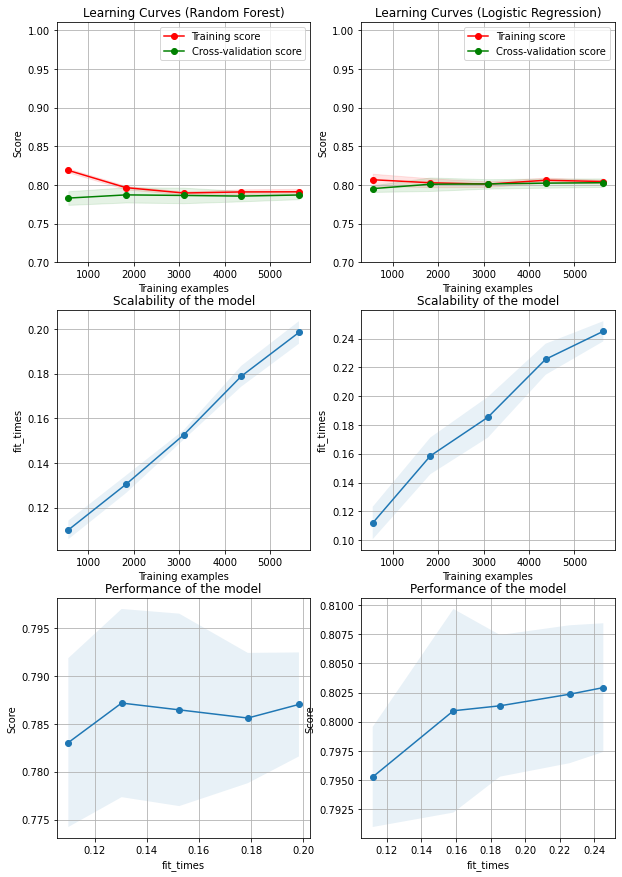

In [56]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = random_state)

title = "Learning Curves (Random Forest)"
estimator = RandomForestClassifier(random_state = random_state, max_depth = 3)
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=skfold, n_jobs=4
)

title = r"Learning Curves (Logistic Regression)"
estimator = LogisticRegression(random_state = 10, max_iter = 1000, fit_intercept=True, penalty='none', solver='newton-cg')
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=skfold, n_jobs=4
)

# 5. Model Training (2nd Round) with Data Conditions

In [57]:
X = df_ohe_friendly[selected_features2].drop(['DeviceProtection_No','Dependents_Yes','MonthlyCharges'], axis = 1)
y = df_ohe_friendly['Churn_Yes']

##### Key Variables #####
random_state = 10
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

## 5.1. Training without scaling

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning:

Rounding errors prevent the line search from converging

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning:

Rounding errors prevent the line search from converging

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning:

Line

[23:31:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:31:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:31:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


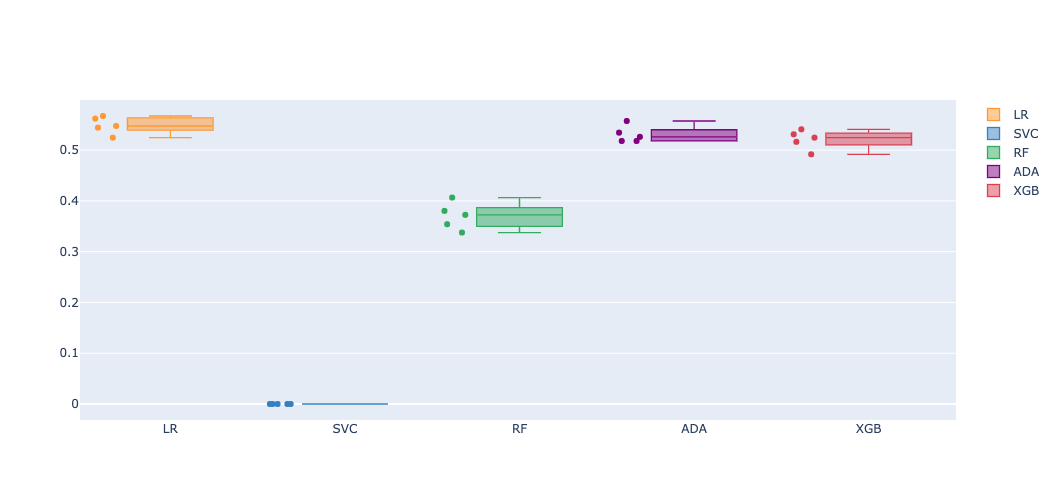

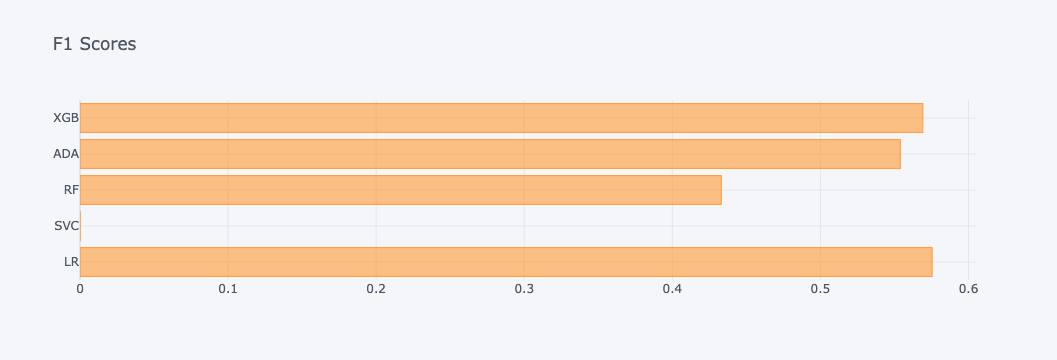

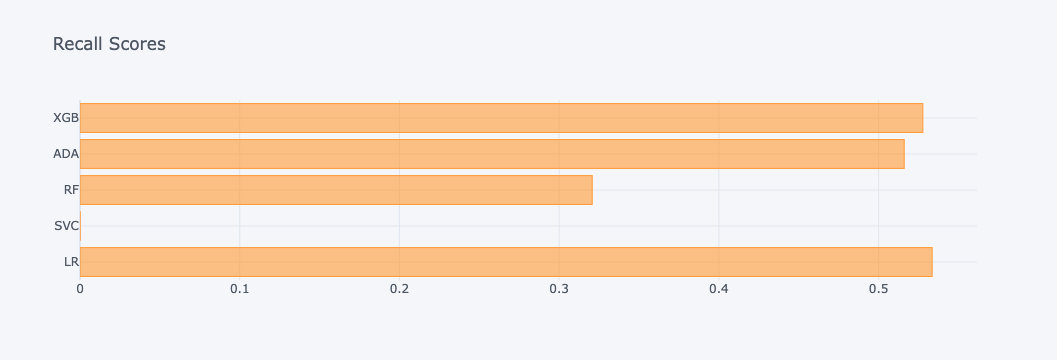

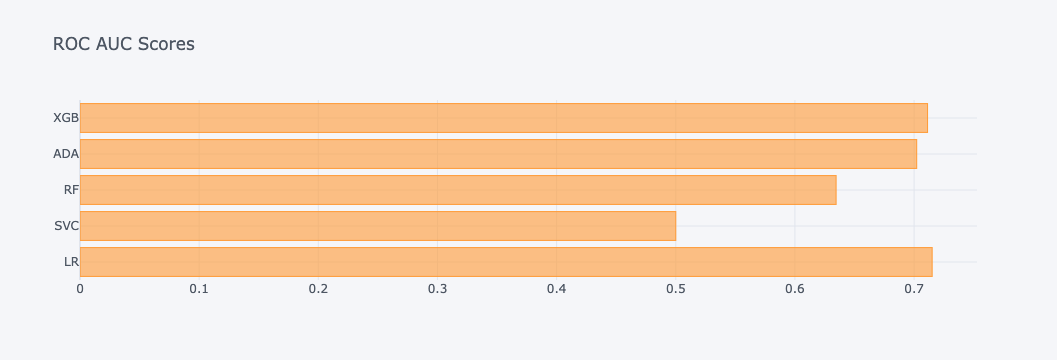

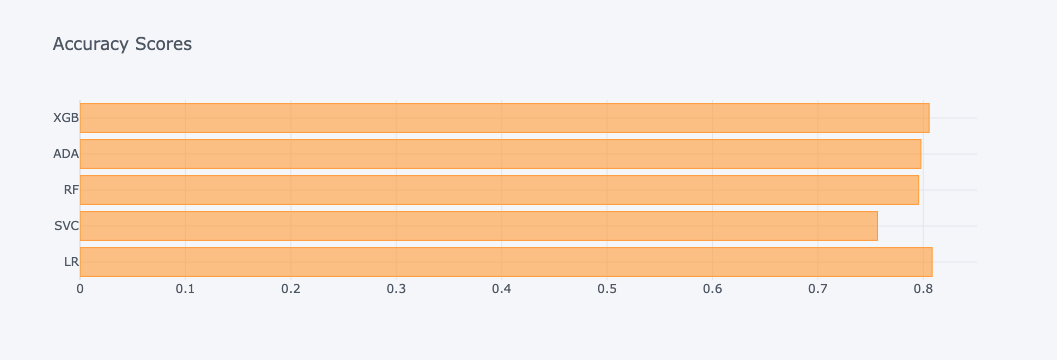

In [58]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, recall_score, roc_auc_score, accuracy_score

models = []

models.append(('LR', LogisticRegression(random_state = 10, max_iter = 1000, fit_intercept=True, penalty='none', solver='newton-cg')))
# models.append(('SVC', SVC(C = 10, degree = 6, kernel = 'poly', random_state = random_state)))
models.append(('SVC', SVC(random_state = random_state)))
models.append(('RF', RandomForestClassifier(max_depth = 3, random_state = random_state)))
models.append(('ADA', AdaBoostClassifier(n_estimators=100, random_state=random_state)))
models.append(('XGB', XGBClassifier(random_state = random_state, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)))

results = []
names = []
f1_scores = []
recall_scores = []
roc_auc_scores = []
acc_scores = []

for name, model in models:
    ## create stratified Kfold
    skfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = random_state)
    cv_results = cross_val_score(model, X_train, y_train, cv = skfold, scoring = 'recall')
    
    results.append(cv_results)
    names.append(name)
    
    y_pred = model.fit(X_train, y_train).predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))
    acc_scores.append(accuracy_score(y_test, y_pred))
    

## SCV results
results_df = pd.DataFrame(results, index=names).T
results_df.iplot(kind = 'box', boxpoints = 'all', title = 'CV Results', layout = layout1)

## Test Scores
scores_df = pd.DataFrame({'F1':f1_scores
                         ,'Recall':recall_scores
                         ,'ROC AUC':roc_auc_scores
                         ,'Accuracy':acc_scores}, index = names)

for score in scores_df.columns:
    scores_df[score].iplot(kind = 'barh', title = '{} Scores'.format(score))


## 5.2. Training with 'Balanced' Class Weights

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:31:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:31:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:31:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


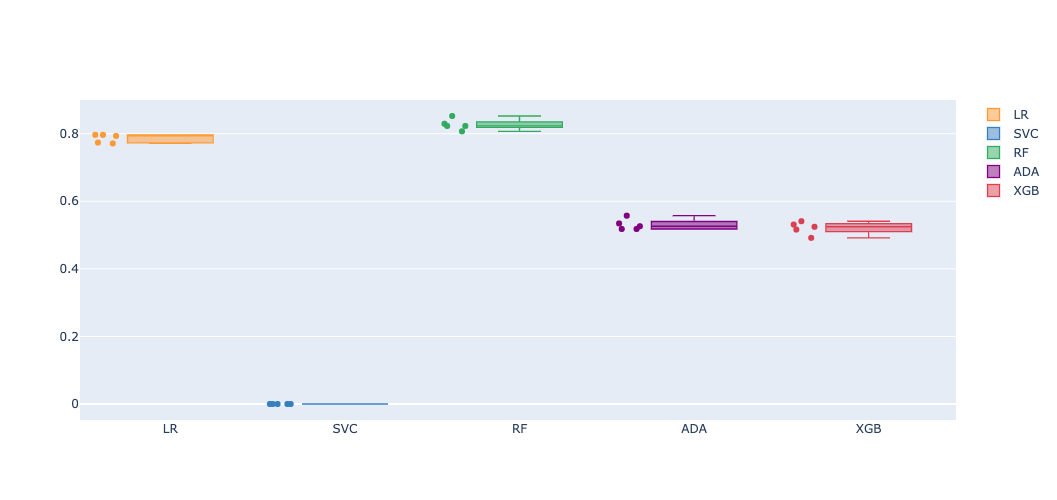

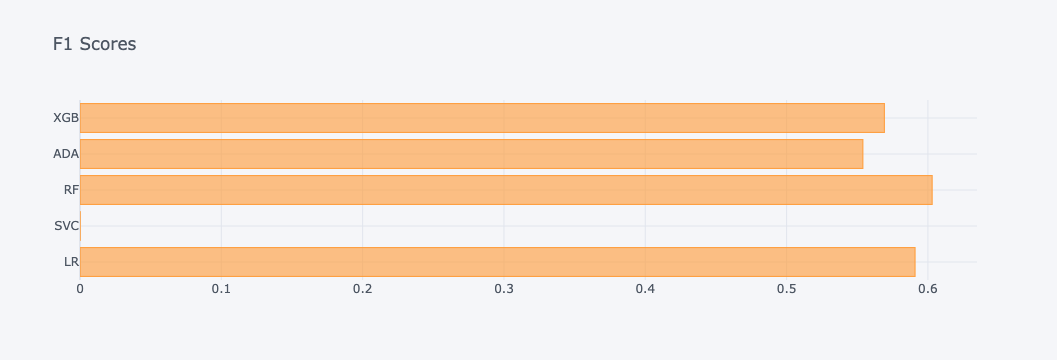

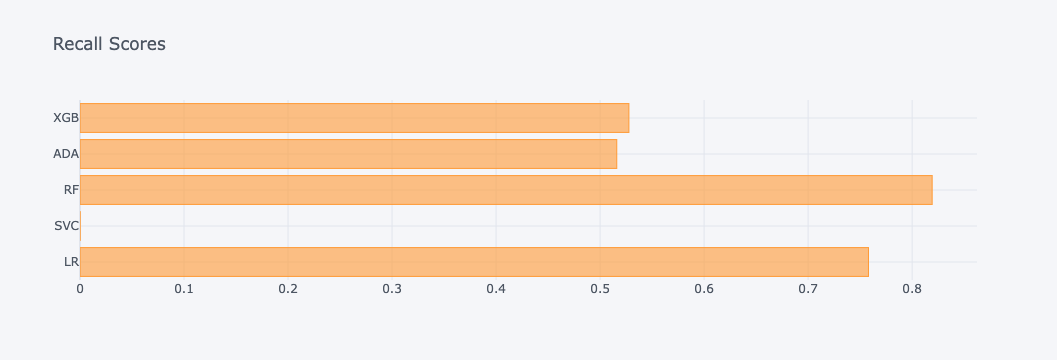

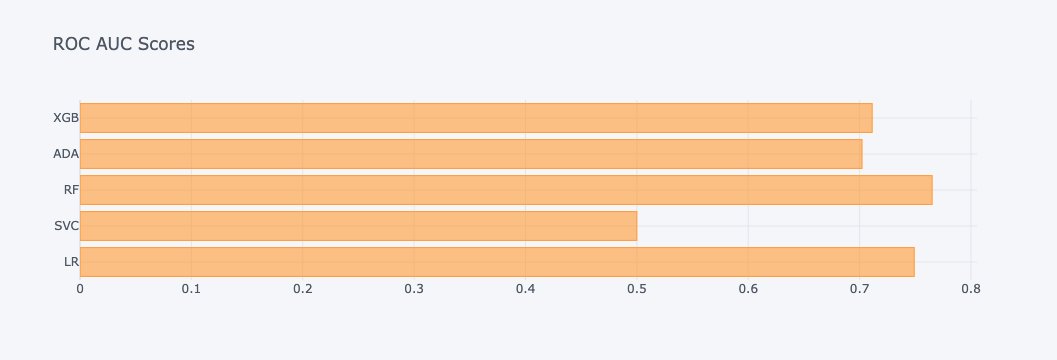

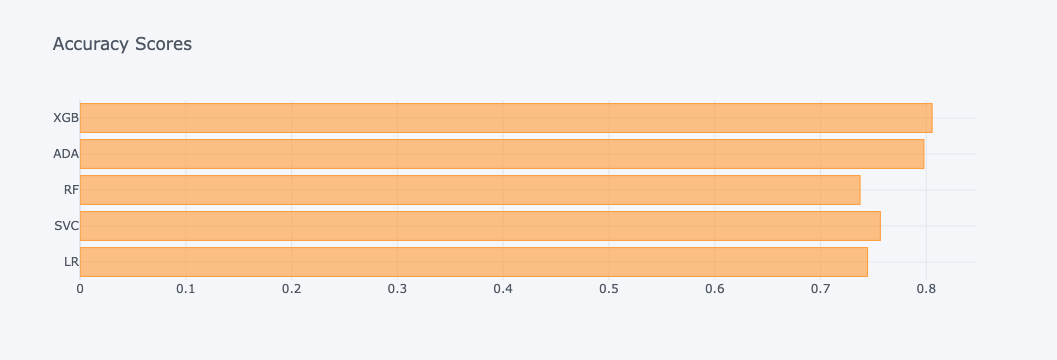

In [59]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, recall_score, roc_auc_score, accuracy_score

models = []

models.append(('LR', LogisticRegression(random_state = 10, max_iter = 1000, fit_intercept=True
                                        , penalty='none', solver='newton-cg', class_weight = 'balanced')))
# models.append(('SVC', SVC(C = 10, degree = 6, kernel = 'poly', random_state = random_state)))
models.append(('SVC', SVC(random_state = random_state)))
models.append(('RF', RandomForestClassifier(max_depth = 3, random_state = random_state, class_weight = 'balanced')))
models.append(('ADA', AdaBoostClassifier(n_estimators=100, random_state=random_state)))
models.append(('XGB', XGBClassifier(random_state = random_state, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)))

results = []
names = []
f1_scores = []
recall_scores = []
roc_auc_scores = []
acc_scores = []

for name, model in models:
    ## create stratified Kfold
    skfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = random_state)
    cv_results = cross_val_score(model, X_train, y_train, cv = skfold, scoring = 'recall')
    
    results.append(cv_results)
    names.append(name)
    
    y_pred = model.fit(X_train, y_train).predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))
    acc_scores.append(accuracy_score(y_test, y_pred))
    

## SCV results
results_df = pd.DataFrame(results, index=names).T
results_df.iplot(kind = 'box', boxpoints = 'all', title = 'CV Results', layout = layout1)

## Test Scores
scores_df = pd.DataFrame({'F1':f1_scores
                         ,'Recall':recall_scores
                         ,'ROC AUC':roc_auc_scores
                         ,'Accuracy':acc_scores}, index = names)

for score in scores_df.columns:
    scores_df[score].iplot(kind = 'barh', title = '{} Scores'.format(score))

## 5.3. Training with 'Balanced' Class Weights with Scaling

In [60]:
# X_cat = df_ohe_friendly[selected_feature] #grouping of categorical values
X_cat = df_ohe_friendly[selected_features2].drop(['DeviceProtection_No','Dependents_Yes','MonthlyCharges','TotalCharges','tenure'], axis = 1) #grouping of categorical values
X_cont = df_ohe_friendly[['TotalCharges','tenure']] # grouping of continuous values
y = df_ohe_friendly['Churn_Yes']

X = pd.concat([X_cat, X_cont], axis = 1)

############## TRANSFORMATION ##############
## 1) Yeo-Johnson Transformation on TotalCharges
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
test_trsf = pt.fit_transform(df_ohe_friendly[['TotalCharges']])
X['TotalCharges_pt'] = test_trsf

## 2) QuantileTransformer on 'tenure'
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution = 'normal')
test_trsf = qt.fit_transform(df_ohe_friendly[['tenure']])
X['tenure_qt'] = test_trsf

X.drop(['TotalCharges','tenure'], axis = 1, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:31:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:31:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:31:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


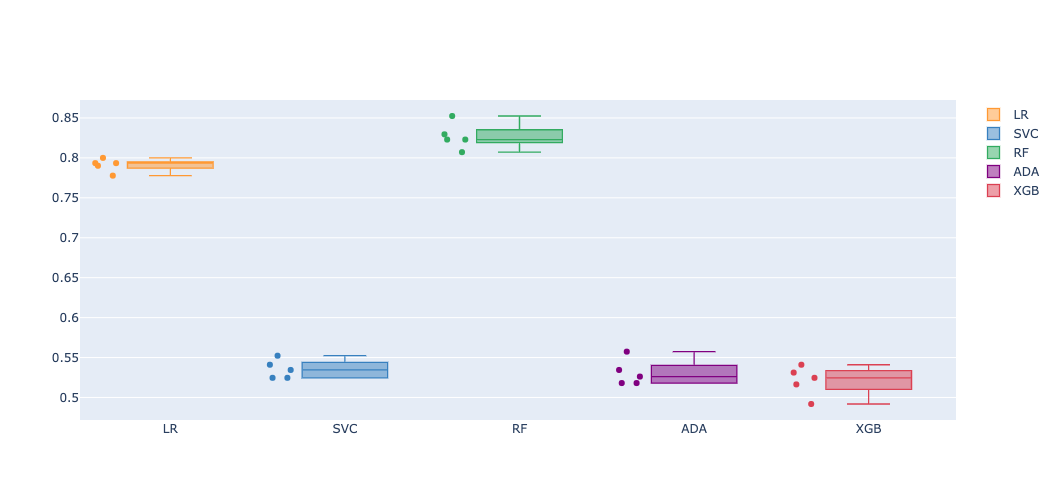

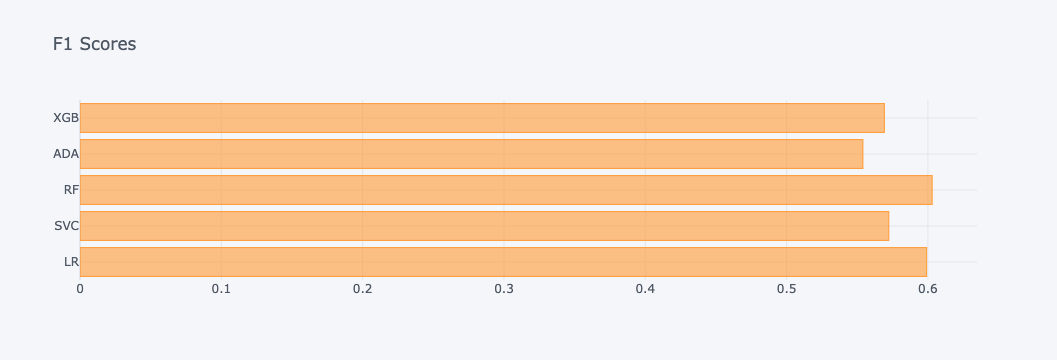

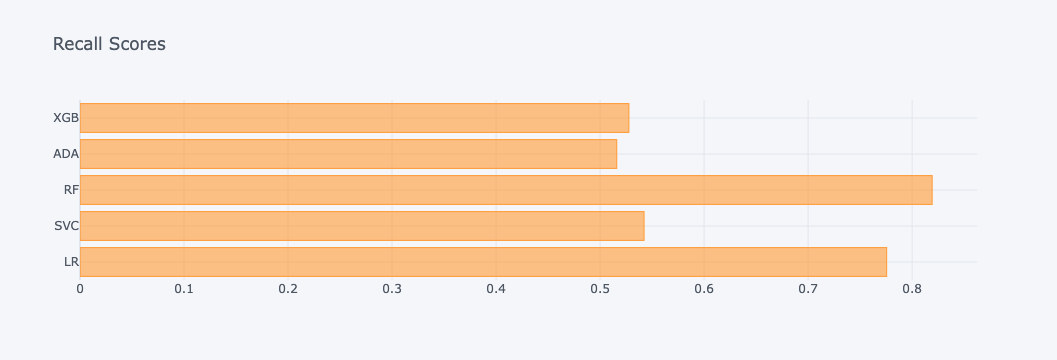

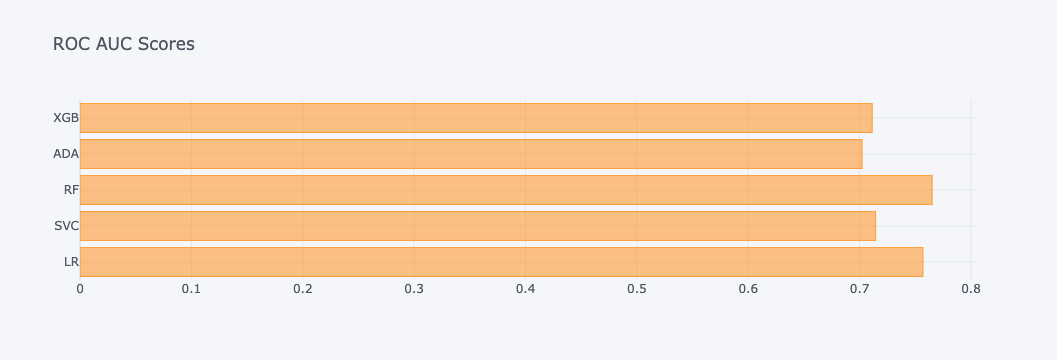

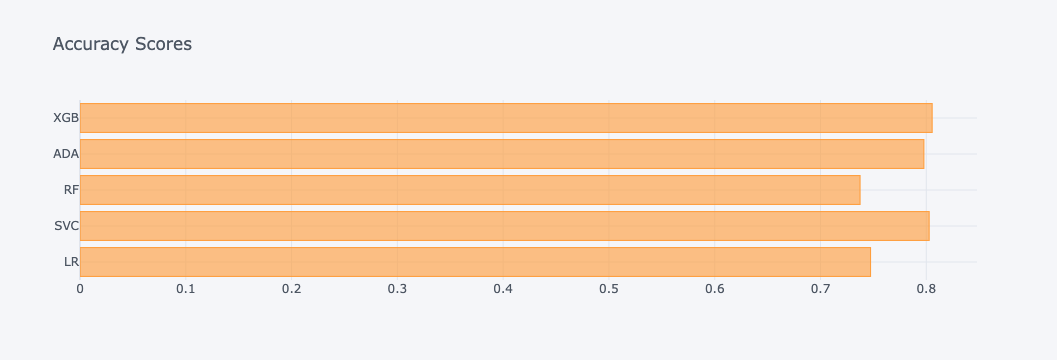

In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, recall_score, roc_auc_score, accuracy_score

models = []

models.append(('LR', LogisticRegression(random_state = 10, max_iter = 1000, fit_intercept=True
                                        , penalty='none', solver='newton-cg', class_weight = 'balanced')))
models.append(('SVC', SVC(C = 10, degree = 2, kernel = 'poly', random_state = random_state)))
# models.append(('SVC', SVC(random_state = random_state)))
models.append(('RF', RandomForestClassifier(max_depth = 3, random_state = random_state, class_weight = 'balanced')))
models.append(('ADA', AdaBoostClassifier(n_estimators=100, random_state=random_state)))
models.append(('XGB', XGBClassifier(random_state = random_state, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)))

results = []
names = []
f1_scores = []
recall_scores = []
roc_auc_scores = []
acc_scores = []

for name, model in models:
    ## create stratified Kfold
    skfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = random_state)
    cv_results = cross_val_score(model, X_train, y_train, cv = skfold, scoring = 'recall')
    
    results.append(cv_results)
    names.append(name)
    
    y_pred = model.fit(X_train, y_train).predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))
    acc_scores.append(accuracy_score(y_test, y_pred))
    

## SCV results
results_df = pd.DataFrame(results, index=names).T
results_df.iplot(kind = 'box', boxpoints = 'all', title = 'CV Results', layout = layout1)

## Test Scores
scores_df = pd.DataFrame({'F1':f1_scores
                         ,'Recall':recall_scores
                         ,'ROC AUC':roc_auc_scores
                         ,'Accuracy':acc_scores}, index = names)

for score in scores_df.columns:
    scores_df[score].iplot(kind = 'barh', title = '{} Scores'.format(score))

## 5.4. Model Selection - Random Forest with 'Balanced' Class Weights and Scaling

In [62]:
X = df_ohe_friendly[selected_features2].drop(['DeviceProtection_No','Dependents_Yes','MonthlyCharges'], axis = 1)
y = df_ohe_friendly['Churn_Yes']

##### Key Variables #####
random_state = 10
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)


TRAIN
      0     1
0  2859  1249
1   263  1263
Train Accuracy Score: 0.73
Mean Train Accuracy Score with CV: 0.73

TEST
     0    1
0  758  308
1   62  281
Test Accuracy Score: 0.74
No Skills AUC: 0.50
Random Forest AUC: 0.83


              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1066
           1       0.48      0.82      0.60       343

    accuracy                           0.74      1409
   macro avg       0.70      0.77      0.70      1409
weighted avg       0.82      0.74      0.75      1409



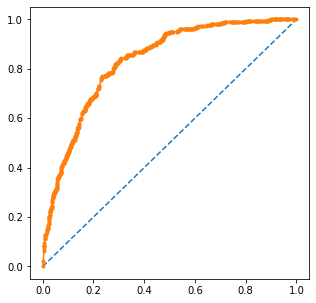

In [63]:
from sklearn.ensemble import RandomForestClassifier

mod = RandomForestClassifier(random_state = random_state, max_depth = 3, class_weight = 'balanced')
res = mod.fit(X_train, y_train)
y_pred_rf = res.predict(X_test)

print("\nTRAIN")
print(pd.DataFrame(confusion_matrix(y_pred = res.predict(X_train), y_true = y_train)))
print('Train Accuracy Score: {:.2f}'.format(res.score(X_train, y_train)))


from sklearn.model_selection import cross_val_score
n_scores = cross_val_score(mod, X_train, y_train, cv = 5, n_jobs = -1)
print('Mean Train Accuracy Score with CV: {:.2f}'.format(np.mean(n_scores)))

############# TEST #############
print("\nTEST")

print(pd.DataFrame(confusion_matrix(y_pred = y_pred_rf, y_true = y_test)))
print('Test Accuracy Score: {:.2f}'.format(res.score(X_test, y_test)))


from sklearn.metrics import roc_curve, roc_auc_score
ns_probs = [0 for _ in list(range(len(y_test)))]
res_probs = res.predict_proba(X_test)[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)
res_auc = roc_auc_score(y_test, res_probs)
print('No Skills AUC: {:.2f}'.format(ns_auc))
print('Random Forest AUC: {:.2f}'.format(res_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
res_fpr, res_tpr, _ = roc_curve(y_test, res_probs)

plt.figure(figsize=(5,5))

plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'No Skill')
plt.plot(res_fpr, res_tpr, marker = '.', label = 'Random Forest')

from sklearn.metrics import classification_report
print('\n')
print(classification_report(y_test, y_pred_rf))

### 5.4.1. Error Analysis (ResponsibleAI)

For this section, we want to use this project library called 'Responsible AI Widgets' (link [here](https://github.com/microsoft/responsible-ai-widgets)).

In [64]:
from raiwidgets import ErrorAnalysisDashboard

from interpret.ext.blackbox import MimicExplainer
from interpret.ext.glassbox import DecisionTreeExplainableModel

explainer = MimicExplainer(res, 
                           X_train, 
                           DecisionTreeExplainableModel, 
                           augment_data=True, 
                           max_num_of_augmentations=10, 
                           features=np.array(X_train.columns), 
                           classes=list(set(y_test)))

In [65]:
global_explanation = explainer.explain_global(X_test)

In [66]:
print('global importance rank: {}'.format(global_explanation.get_feature_importance_dict()))

global importance rank: {'Contract_Month-to-month': 0.7454399457036325, 'InternetService_Fiber optic': 0.37365407595608935, 'tenure': 0.1706823210722582, 'PaymentMethod_Electronic check': 0.16679250466988513, 'PaperlessBilling_Yes': 0.08766894353611959, 'TotalCharges': 0.07914366542078871, 'OnlineSecurity_No': 0.036927141005098175, 'StreamingMovies_No': 0.035183129485995134, 'TechSupport_No': 0.008157522092314243, 'OnlineBackup_No': 0.00258570000921992, 'PhoneService_Yes': 0.00204506679003659}


This function will render a report whose size is ~10mb. This will prevent GitHub from rendering the .ipynb. Hence, to view this dashboard, download and run it on your machine. Alternatively, you may view the first page of the report in the 'ErrorAnalysisDecisionTree.png' file.

# 6. Summary

The use of class weights to handle imbalanced dependent variables is done at the algorithm level. In spite the improvement to the model's recall score, a ML practitioner still needs to iterative work on this model's dependent variable to either gather more data for the minority class, or identify ways to create or find better features to create a more balanced data set. 

In the above scenario, we've learnt the following:
- We've individually trained each model to observe it's performance
- Attempted Model Stacking
- Used a comparative approach to assess individual model performance with different properties.
- Seen the positive impacts of using class_weight = 'balanced' and knowing it applies only to Random Forest and Logistic Regression
- Used an Error Analysis approach to decipher how else we can improve upon our current model.

From the above analysis, there was no difference in results for the Random Forest model if the data was scaled or not. Yet, under the recall metric, Random Forest with balanced class weights outperformed other models. Hence, our final model is the Random Forest on Balanced Class Weights and Un-Scaled data. It produced a recall scores of 0.82. The benefits of such a high recall score ensures we reduce our False Negative predictions (people who are going to churn yet failed to be detected). However, one noticeable area of concern is the poor precision score that will produce a high count of false positives. The Business could spam these customers or fail to maximise their spending patterns with the business should the strategies to retain these customers be in terms of credits/discounts. Hence, the business needs to work backwards from the best means to retain customers and weigh the costs involved to also then choose the next best model.

Should the Random Forest be the final model to be adopted, then the use of Error Analysis by Responsible AI (refer to the ErrorAnalysisDecisionTree.png) has shown that the data we're incorrectly predicting are mostly observations that have monthly contracts with the telco and who have lesser than $5950.78 for total charges. These set of customers contribute to 84.86\% of the errors. By getting more data for this demographic, we could retrain the tree to see if it can better differentiate the characteristics of those who will or will not churn.

# 7. References

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 10.1038/s41586-020-2649-2. (Publisher link).

J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007

Plotly Technologies Inc. Title: Collaborative data science Publisher: Plotly Technologies Inc. Place of publication: Montréal, QC Date of publication: 2015 URL: https://plot.ly

Telco_Churn_Detailed_EDA & 8_Classification_Models. (2021). From https://www.kaggle.com/azizozmen/telco-churn-detailed-eda-8-classification-models

Generate Reports Using Pandas Profiling, Deploy Using Streamlit. (2021). Retrieved 7 December 2021, from https://www.analyticsvidhya.com/blog/2021/06/generate-reports-using-pandas-profiling-deploy-using-streamlit/

Skewness and Kurtosis |Shape of data: Skewness and Kurtosis. (2021). Retrieved 7 December 2021, from https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/

How To Dealing With Imbalanced Classes in Machine Learning. (2020). Retrieved 7 December 2021, from https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights

Krawczyk, B. (2016). Learning from imbalanced data: open challenges and future directions. Progress In Artificial Intelligence, 5(4), 221-232. doi: 10.1007/s13748-016-0094-0

Molnar, C. (2021). Interpretable Machine Learning. Retrieved 7 December 2021, from https://christophm.github.io/interpretable-ml-book/